# Part1. 탐색적 자료 분석 (EDA)

## 1단계. 데이터 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

print(plt.style.available) #테마 바꾸기

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [3]:
data=pd.read_csv('C:/jupyter notebook/python kaggle/train.csv')

## 2단계. 데이터 모양 확인

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3단계. 데이터 타입 확인

In [5]:
# 변수 타입 제대로 맞추기 위해 확인한다. 숫자로 된 범주형 변수가 int64로 들어가는 경우 주의
# 범주형 변수는 object / 수치형 변수는 int64 or float64

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 데이터 타입 분류
```
1. Categorical Features(범주형 변수)
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.
For example, gender is a categorical variable having two categories (male and female).
Now we cannot sort or give any ordering to such variables.

Categorical Features in the dataset: Sex,Embarked.

2. Ordinal Features(순서형 변수)
we can have relative ordering or sorting between the values.
If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. 
Here we can have a relative sort in the variable.

Ordinal Features in the dataset: PClass

3. Continous Feature(연속형 변수)
it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Age

```

## 데이터 결측치 확인

```
[결측치 처리 방법]
1. complete data analysis: 불완전한 자료 모두 무시
2. 평균대치법: 관측으로 얻어진 자료의 적절한 평균값으로 대치
3. 단순확률 대치법: hot-deck
- hot-deck: 변수들이 비슷한 값을 갖는 유사한 집단에서 임의의 한 개체를 선택해서 대체
```

In [6]:
data.isnull().sum() #결측치 확인-> Age,Cabun,Embarked 수정해야 함

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

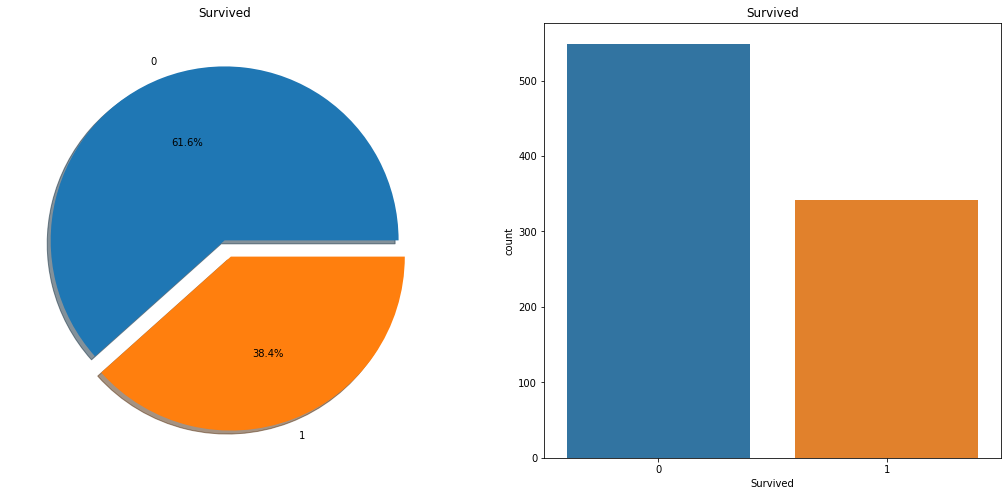

In [7]:
# f : 전체 사이즈를 말한다. subplot 안에 몇 개의 그래프가 있든지 상관없이 그걸 담는 하나
# ax : 전체 중 낱개를 말한다. subplot 안에 2개 (a1, a2)의 그래프가 있다면 순서대로 a1 과 a2를 의미한다.

f,ax=plt.subplots(1,2,figsize=(18,8))

# value_counts:  각 값의 개수 세기
# explode : pie 그래프의 간격 조정
# autopct : pie 그래프 내 표시될 글자 형태

data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Survived')
ax[0].set_ylabel('') #y축 라벨 공백으로

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [8]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

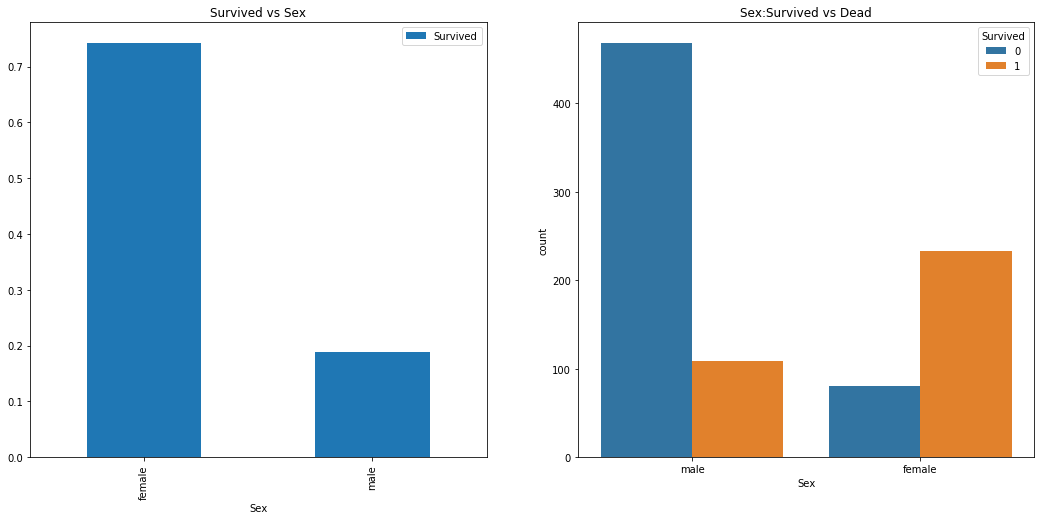

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

#hue=사용할 열
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

# crosstab
```
crosstab은 cross(가로지르다)와 tabulation (도표 작성, 표, 목록)이라는 말의 줄임말로 여러 개의 데이터 프레임에서 필요한 열을 가져다가 표를 작성할 수 있다는 의미이다.

[필수사항]

* index : 인덱스는 변수에 반드시 써 넣어줘야하는 변수이다.

* columns : 열은 변수에 반드시 써 넣어줘야하는 변수이다.

[선택사항]
* values : array형태면 가능하고 optional 선택사항이다. 다만 values를 쓰기 위해서는 aggfunc를 반드시 특정해주어야한다.

* aggfunc : 함수를 넣는 부분이고 optional 선택 사항이다. 다만 변수 선언에 values가 존재해야만 사용이 가능하다.

* rownames : 행 이름 변환 해주는 것 default : None

* colnames : 열 이름 변환 해주는 것 default : None

* margins : 행과 열의 가장자리에 합을 기입해서 보여줄 수 있는 변수이다. default는 None이기 때문에 설정해주지 않으면 표시되지 않는다.

* margins_name : margins의 이름을 설정하는 변수로 default : 'All'

* dropna : 열의 값들이 모두 Nan으로 되어있는 해당 열을 제외시키기 위한 변수로
 이미 default: True가 설정되었기 때문에 자동으로 실행된다. 열의 모든 값들이 0으로 입력되면 그 열은 삭제

* normalize : {'all','index','columns'}의 형태나 {0,1}의 형태로 표기가 가능하며 표기된 기준을 토대로 데이터프레임 안의 값들을 기준의 총 값들로 나눈 값으로 표기하여 정규화할 수 있는 변수이다.

In [10]:
#pd.crosstab(index,columns,values,aggfunc)
#cmap(color map) 에서 색 뽑아쓰기

pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


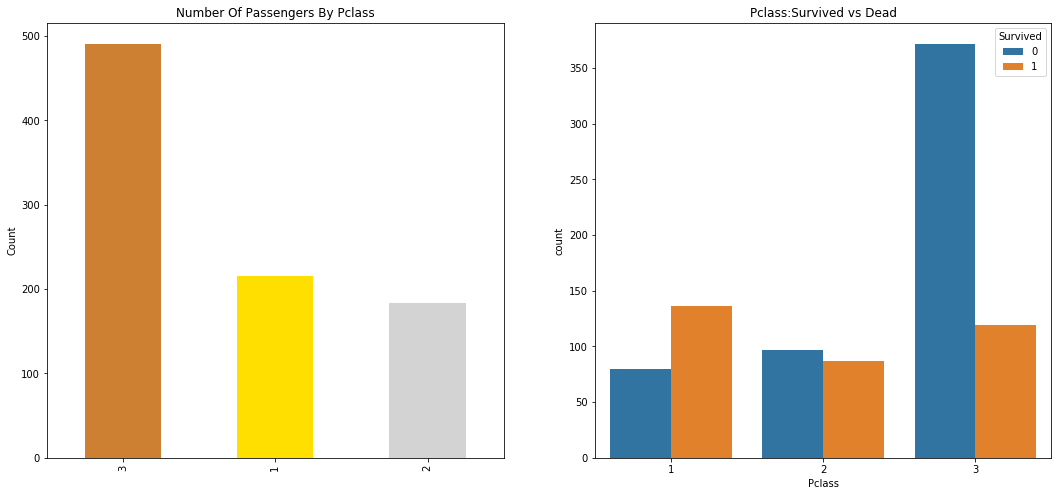

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [12]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

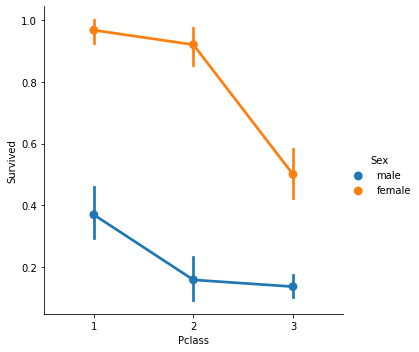

In [13]:
#factorplot은 범주형 변수를 세분화하기 좋다

sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

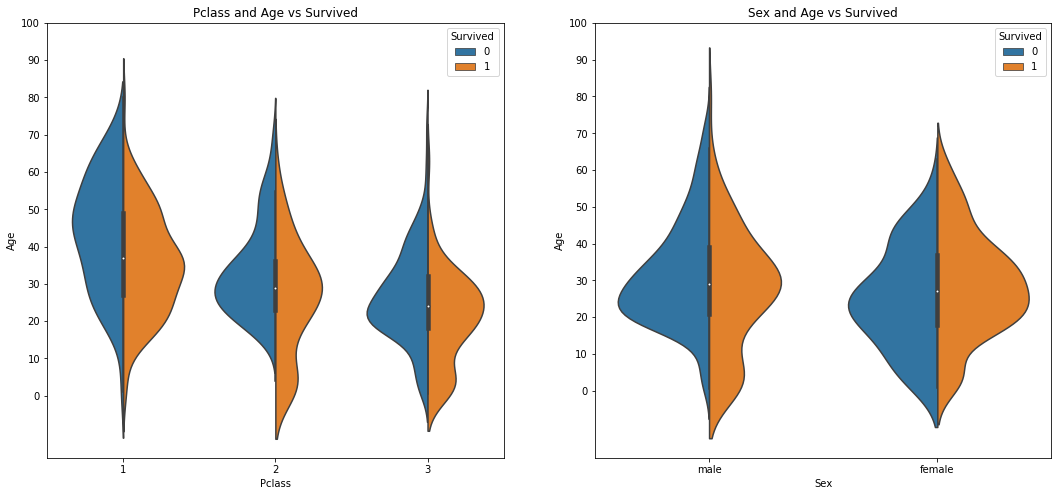

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))

#split=true 각자 2개인 것을 합쳐서 하나로

sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived') 

# y축 범위 조정
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### 나이에 존재하는 177개의 결측치를 처리해야함
### 나이의 평균으로 눌값을 교체하면 오차가 커짐
### 나이는 없어도 이름을 통해 성별을 나눌 수는 있다.

In [15]:
# A-Z or a-z 사이에 있고 .으로 끝나는 문자 추출

data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [16]:
# 이니셜과 성별을 교차해서 확인하기

pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
# 스펠링 오류난 것 제대로 수정하기

data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
# 이니셜 그룹의 나이 평균 알아보기

data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
#결측치 평균값으로 채워주기

data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [20]:
#결측치 확인하기

data.Age.isnull().any()

False

## 4. 종속변수 분포 살펴보기

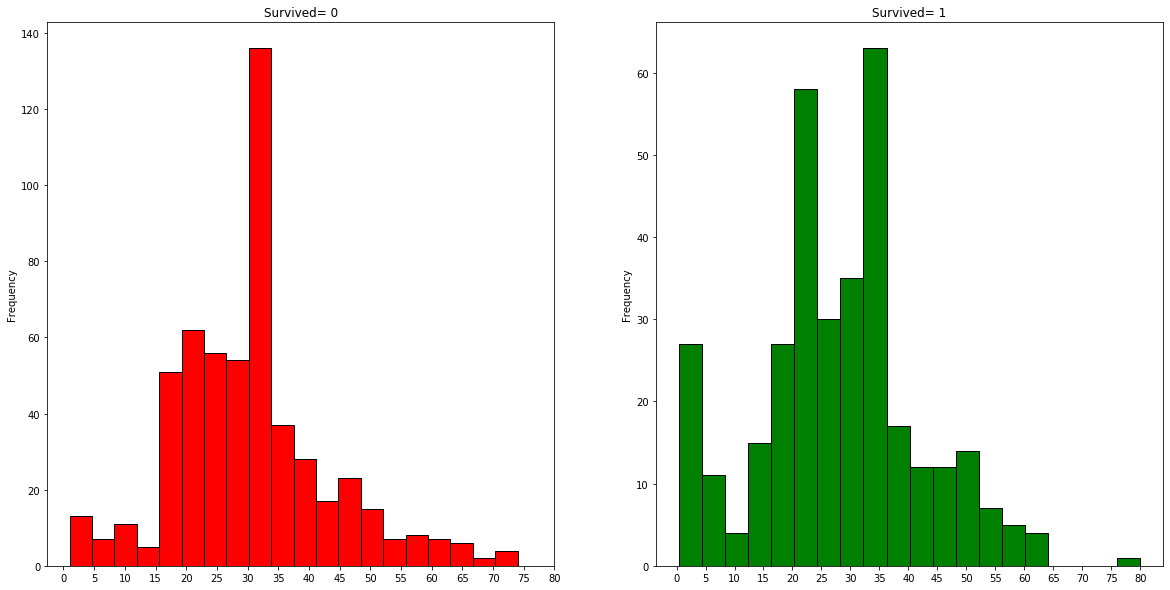

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')

#x축 범위 재설정
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# 관찰한 것

```
1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.
```

## 5단계. 변수 분포 살펴보기

### 순서형 변수 분포 파악

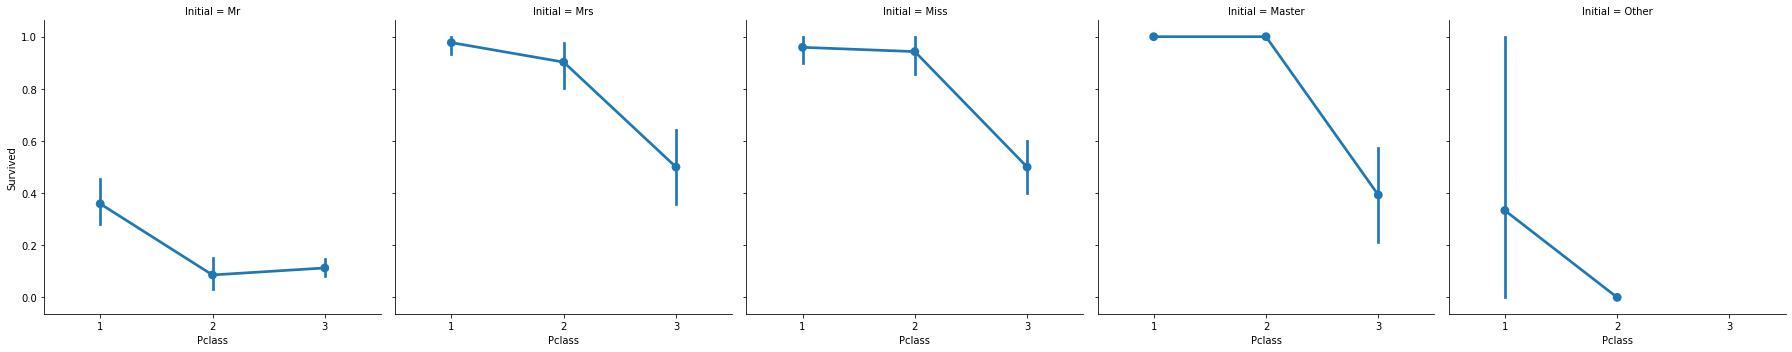

In [22]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

### 명목형 변수 분포 살펴보기

#### 탑승항구에 따른 생존 가능성 알아보기

In [23]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

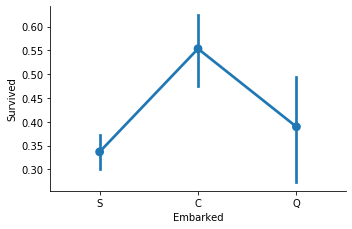

In [24]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()


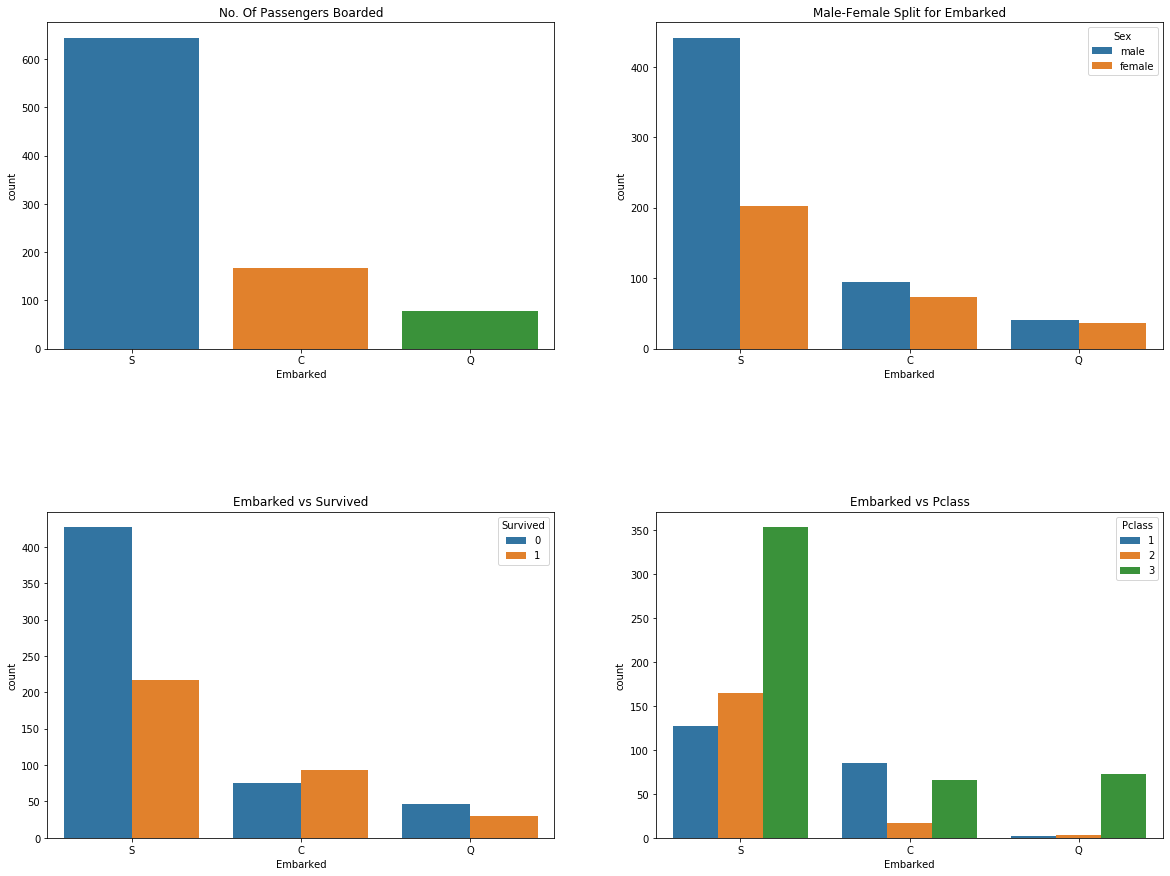

In [25]:
# 2행 2열로 된 서브플롯으로 시각화

f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

# 관측한 것
```
1)Maximum passenegers boarded from S. Majority of them being from Pclass3.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4)Port Q had almost 95% of the passengers were from Pclass3.
```

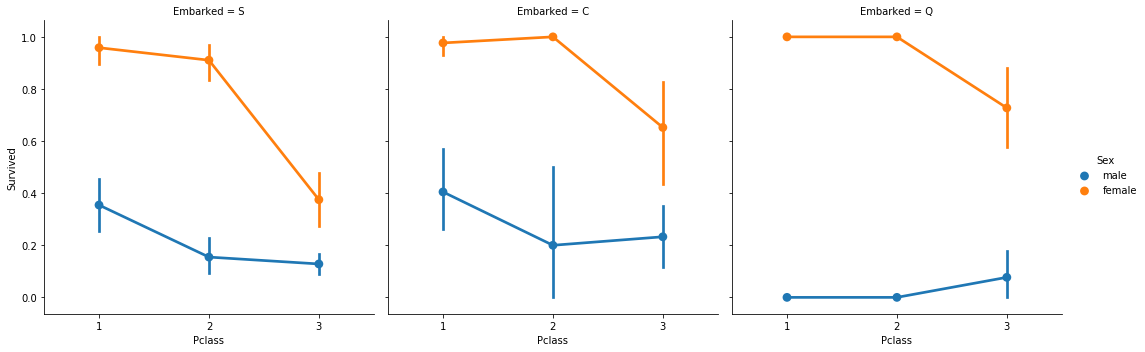

In [26]:

sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

### Embarked 결측치 가장 많은 탑승객의 탑승구였던 S로 대체하기

In [27]:
data['Embarked'].fillna('S',inplace=True)

In [28]:
data.Embarked.isnull().any()

False

### 연속형 변수 분포 확인하기

#### 혼자였는지 가족과 함께 였는지 확인한다.

In [29]:

pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


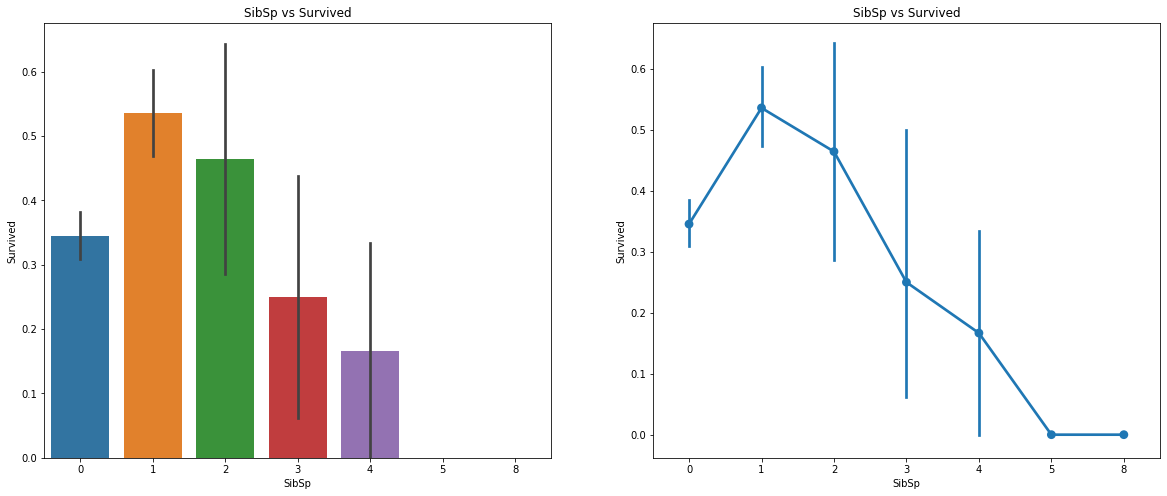

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [31]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


# 관찰한 것 

```
if a passenger is alone onboard with no siblings, he have 34.5% survival rate.
The graph roughly decreases if the number of siblings increase. 

he crosstab shows that Person with SibSp>3 were all in Pclass3.
It is imminent that all the large families in Pclass3(>3) died.
```

In [32]:
# parch : 가족 
# sibsp: 형제 자매

pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


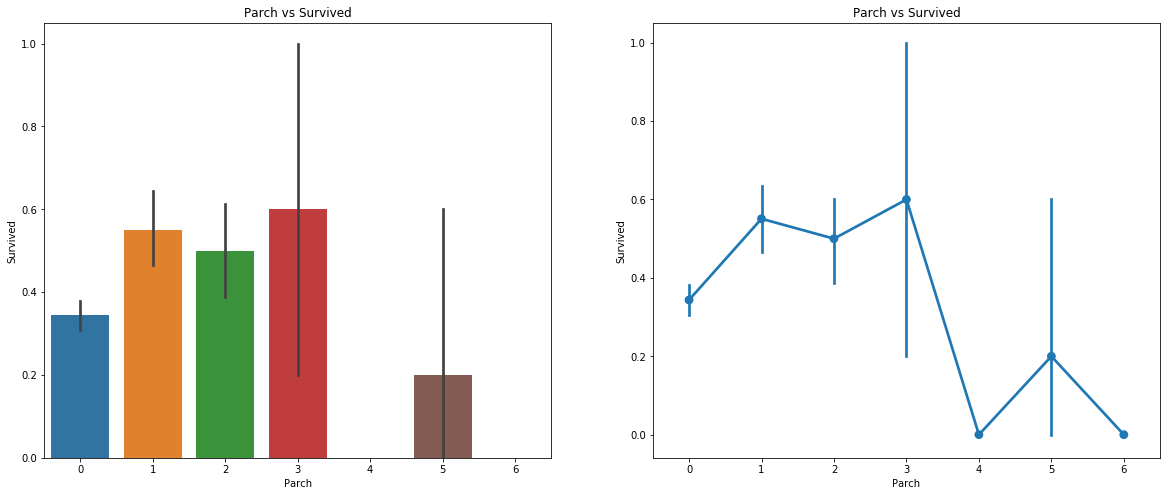

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [34]:
print("위에서 그래프가 1개만 나오는 문제 해결해야 함")

위에서 그래프가 1개만 나오는 문제 해결해야 함


### fate 변수 확인

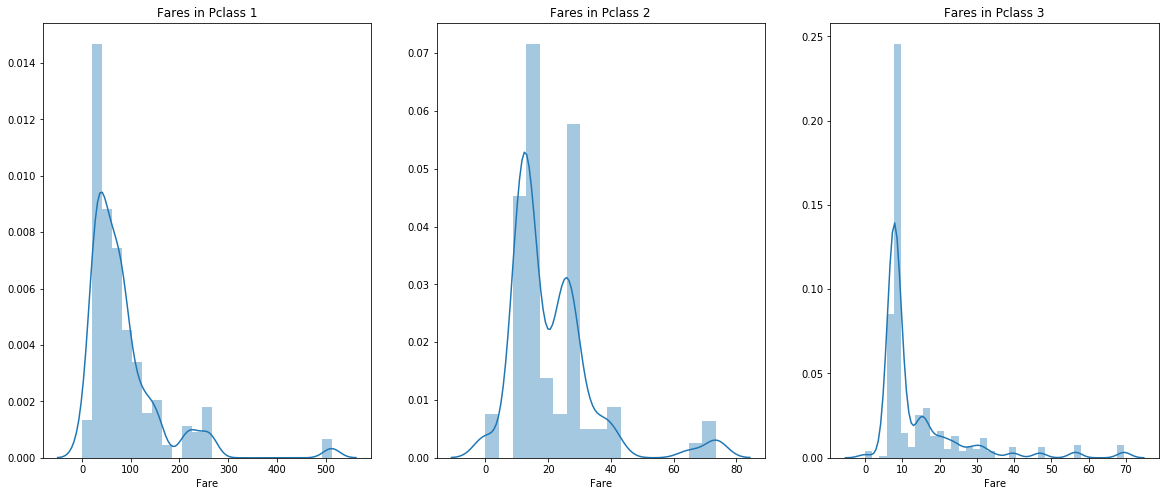

In [35]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

## 변수 확인 총정리

```
1. sex:여자가 남자보다 생존확률이 더 높음
2. Pclass: 더 좋은 class에 있는 사람이 생존확률이 더 높음
3. Age: 5-10살 아이들의 생존확률이 높았고, 15-35살이 많이 죽었다
4. Embarked: Pclass가 1등급인 사람들이 주로 S 탑승구를 이용했지만 탑승구 C에 탄 사람들의 생존확률이 더 높았다.
5. Parch+SibSp: 1명에서 2명의 형제자매나 또는 1-3명의 부모와 함께한 생존률이 혼자 오거나 대가족에 비해서 높은 생존률을 보였다.
```

## 6단계. 상관관계 확인

```
[유의할 점]
알파벳이나 문자열의 상관관계 자체가 해당되지 않는다.숫자 특징만 비교.
```

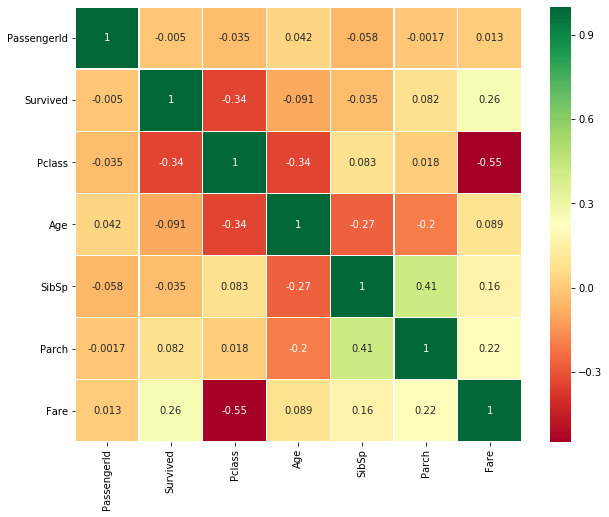

In [36]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 히트맵 해석: 변수들 간 상관관계가 별로 없다. 가장 높은 상관관계는 SibSp와 Parch로  0.41이다.

# Part2: Feature Engineering and Data Cleaning

## 1단계. 연속형 변수를 범주형 변수로 변환

### 1) Age 변수: 연속적인 값을 비닝 또는 정규화를 통해 범주형 값으로 변환 -> Age_band라는 새로운 범주형 변수 생성

In [37]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
# 각 등극별 데이터 수 확인

data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


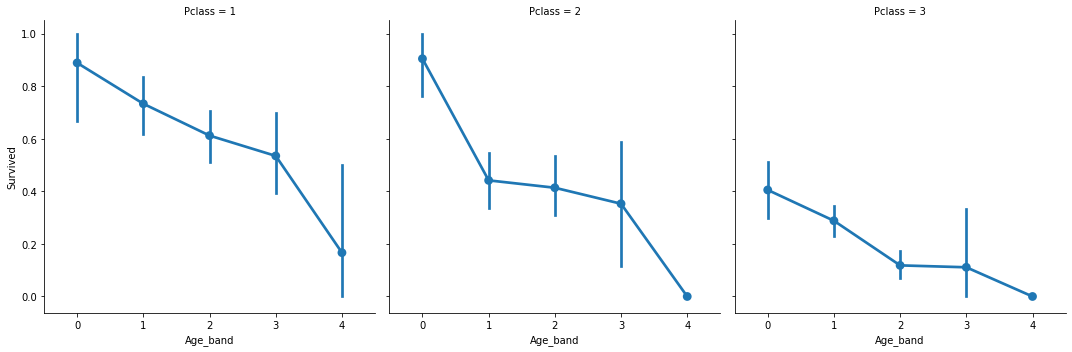

In [39]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

#### Pclass와 상관없이 나이가 들수록 생존율은 감소한다.


## 2) "Family_size"와 "Alone"이라는 새로운 변수를 만들어 분석.

In [40]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

In [41]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


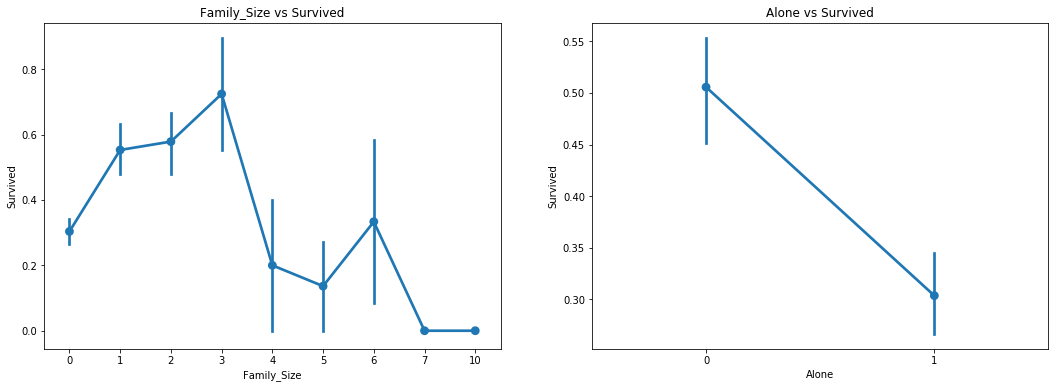

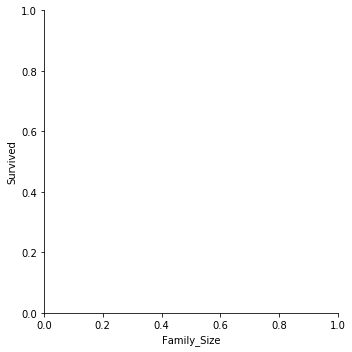

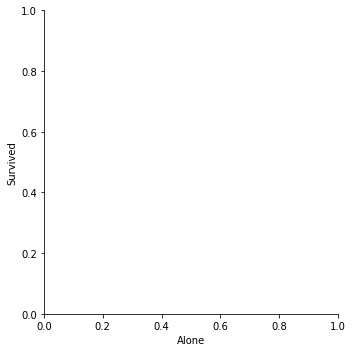

In [42]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

###  if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. 

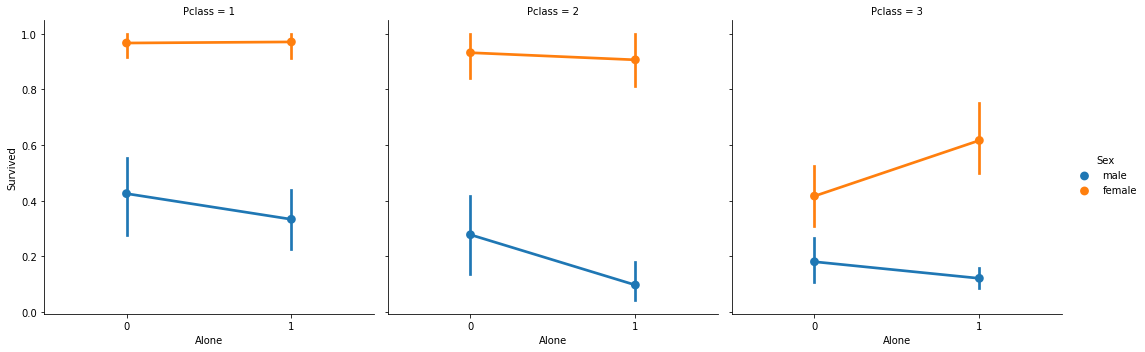

In [43]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

### 3) fare 변수: 연속적인 값을 순서형 변수로 변환 -> Fare_range라는 새로운 범주형 변수 생성

* pandas.qcut으로 레이블링: 나누고자 하는 범주 갯수만 정해주면, 판다스가 각 범주에 동등한 갯수가 되도록 알아서 나눠준다

In [44]:
data['Fare_Range']=pd.qcut(data['Fare'],4)

In [45]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Initial      891 non-null    object  
 13  Age_band     891 non-null    int64   
 14  Family_Size  891 non-null    int64   
 15  Alone        891 non-null    int64   
 16  Fare_Range   891 non-null    category
dtypes: category(1), float64(2), int64(8), object(6)
memory usage: 112.6+ KB


In [46]:
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [47]:
# 위에 안 뜨는 이유?

In [48]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

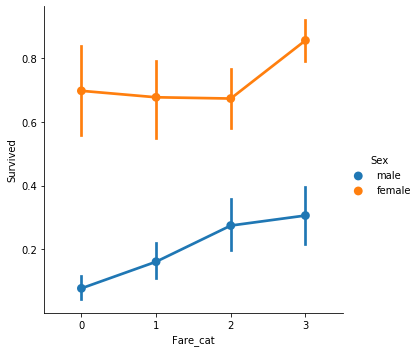

In [49]:

sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()



### 4) 문자열 변수을 숫자로 바꿔서 예측모델 만들때 사용

In [50]:


data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)


### 5) 불필요한 변수 제거

#### 혼합형 데이터: 숫자, 알파벳 등으로 이루어진 데이터로 특성을 찾기 어려운 데이터. ex) Ticket, Cabin

```
Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.

```

In [51]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

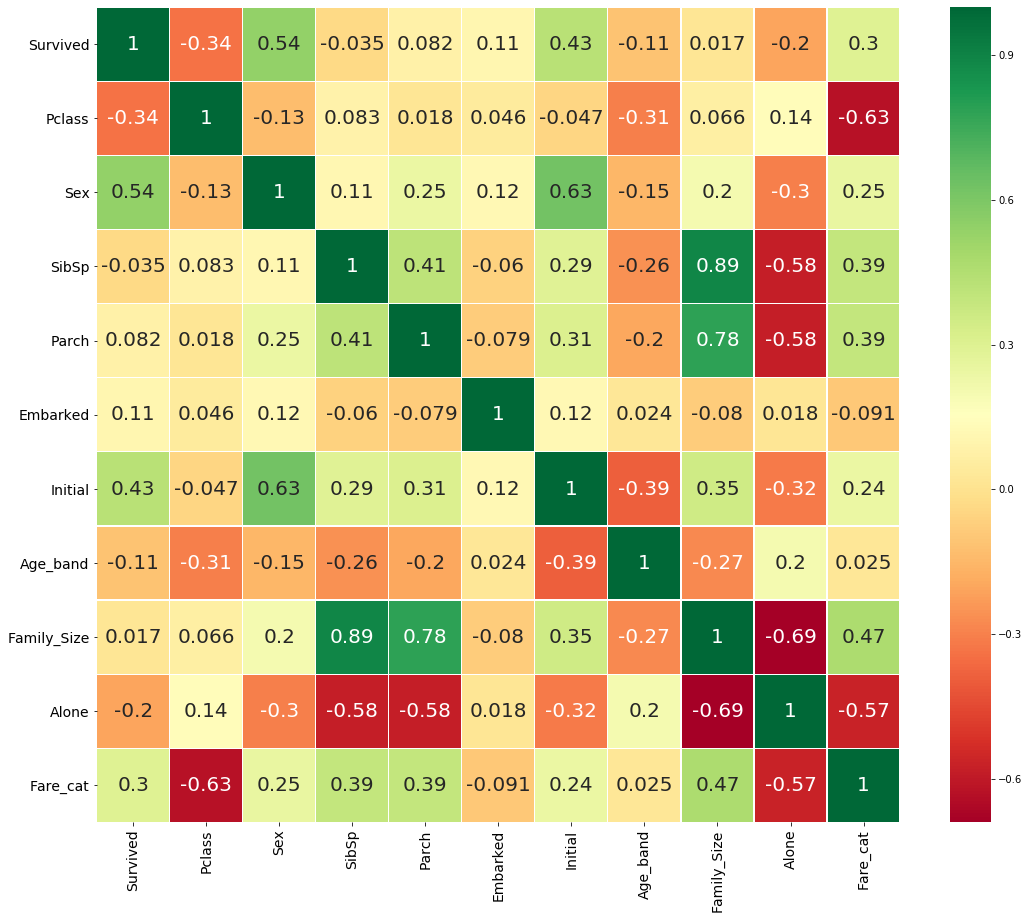

In [52]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### SibSp andd Family_Size 와 Parch and Family_Size와 Alone and Family_Size.

# Part3: Predictive Modeling

## Scikit-Learn(sklearn): 머신러닝과 관련된 다양한 기능을 담은 파이썬 라이브러리

* 지도학습인 분류(classification)와 회기(regression)부터 비지도학습의 일종인 클러스터링(clustering), 차원 축소(dimensionality reduction) 그리고 전처리 기능(preprocessing)까지 다양한 머신러닝에 필요한 기능들을 제공.

## 정규화


머신러닝 알고리즘은 데이터가 가진 feature(특성)들을 비교하여 데이터의 패턴을 찾는다.그런데 여기서 주의해야 할 점이 있다. 데이터가 가진 feature의 스케일이 심하게 차이가 나는 경우 문제가 되기 때문이다.

각 데이터 포인트를 비교할 때 더 큰 스케일을 가진 feature, 즉 얼마나 오래 전에 지어졌는지(년)에 따라 그 데이터가 완전히 좌지우지 되는 꼴이다.
아래 그림을 보면 이해가 쉬울 것 같다.


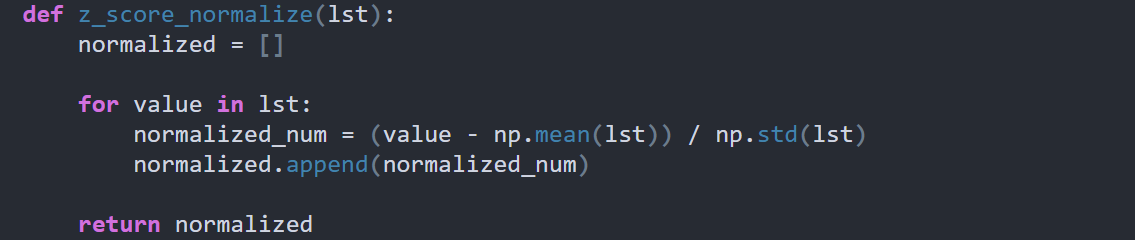

그런데 그림에서도 알 수 있듯이 만약 두 집이 비슷한 시기에 지어졌을 경우 두 데이터 포인트가 매우 가깝게 위치하게 된다. 방 개수 같은 건 별로 중요한 요소가 아니게 되는 거다.그래서 모든 데이터 포인트가 동일한 정도의 스케일(중요도)로 반영되도록 해주는 게 정규화(Normalization)의 목표다.

### [정규화 방법]

1) Min-Max Normalization (최소-최대 정규화)

최소-최대 정규화는 데이터를 정규화하는 가장 일반적인 방법이다. 모든 feature에 대해 각각의 최소값 0, 최대값 1로, 그리고 다른 값들은 0과 1 사이의 값으로 변환하는 거다.

예를 들어 어떤 특성의 최소값이 20이고 최대값이 40인 경우, 30은 딱 중간이므로 0.5로 변환된다.

만약 X라는 값에 대해 최소-최대 정규화를 한다면 아래와 같은 수식을 사용할 수 있다.

(X - MIN) / (MAX-MIN) 

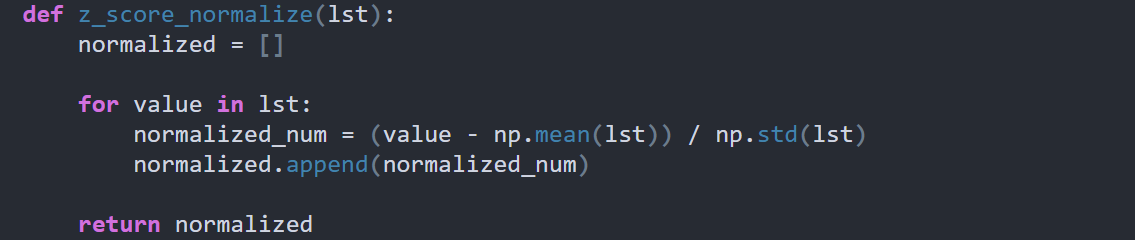

그런데 최소-최대 정규화에는 치명적인 단점이 있다. 이상치(outlier)에 너무 많은 영향을 받는다는 거다.

예를 들어, 100개의 값이 있는데 그 중 99개는 0과 40 사이에 있고, 나머지 하나가 100이면 어떨까. 그러면 99개의 값이 모두 0부터 0.4 사이의 값으로 변환된다.

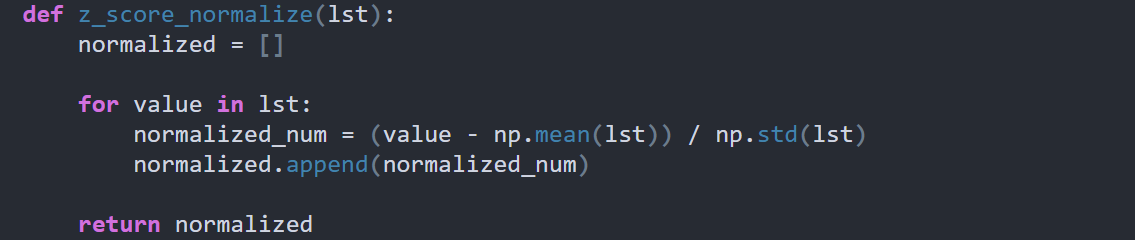

2) Z-Score Normalization (Z-점수 정규화)

Z-점수 정규화는 이상치(outlier) 문제를 피하는 데이터 정규화 전략이다.

X라는 값을 Z-점수로 바꿔주는 식은 아래와 같다. (사실 고등학교 수학 시간에 정규분포, 표준점수 등의 개념으로 다루는 내용이다.)

(X - 평균) / 표준편차

만약 feature의 값이 평균과 일치하면 0으로 정규화되겠지만, 평균보다 작으면 음수, 평균보다 크면 양수로 나타난다. 이 때 계산되는 음수와 양수의 크기는 그 feature의 표준편차에 의해 결정되는 거다. 그래서 만약 데이터의 표준편차가 크면(값이 넓게 퍼져있으면) 정규화되는 값이 0에 가까워진다.

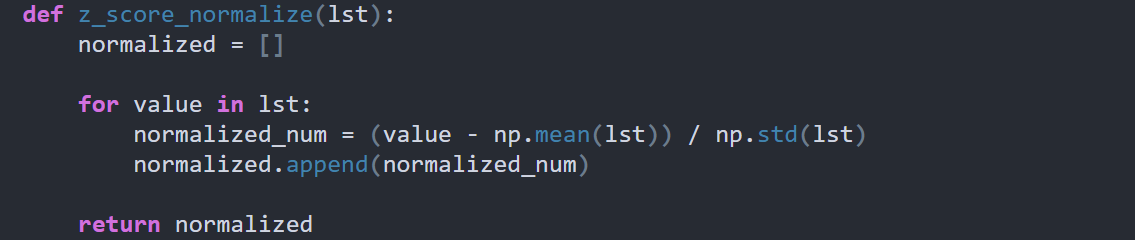



In [53]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

## sklearn의 train_test_split() 사용법

- 머신러닝 모델을 학습하고 그 결과를 검증하기 위해서는 원래의 데이터를 Training, Validation, Testing의 용도로 나누어 다뤄야 한다.

- 사용방법이 쉽고 셔플까지 적용되므로 간단하고 합리적인 함수이지만 Validation Set을 따로 만들어주지는 않는다. 
  Validation Set이 필요하다면 분할한 데이터 중 한 덩어리에 해당 함수를 한 번 더 사용하면 된다.

#### from sklearn.model_selection import train_test_split
#### train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)


(1) Parameter

arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)

shuffle : 셔플여부설정 (default = True)

stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, 
           stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.


2) Return

X_train, X_test, Y_train, Y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.

X_train, X_test : arrays에 레이블 없이 데이터만 넣었을 경우의 반환

In [54]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

## 서포트 벡터 머신 (Support Vector Machine)
결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델. 
분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제를 수행할 수 있게 된다.
결국 이 결정 경계라는 걸 어떻게 정의하고 계산하는지 이해하는 게 중요함. 
결정 경계는 데이터 군으로부터 최대한 멀리 떨어지는게 좋다.

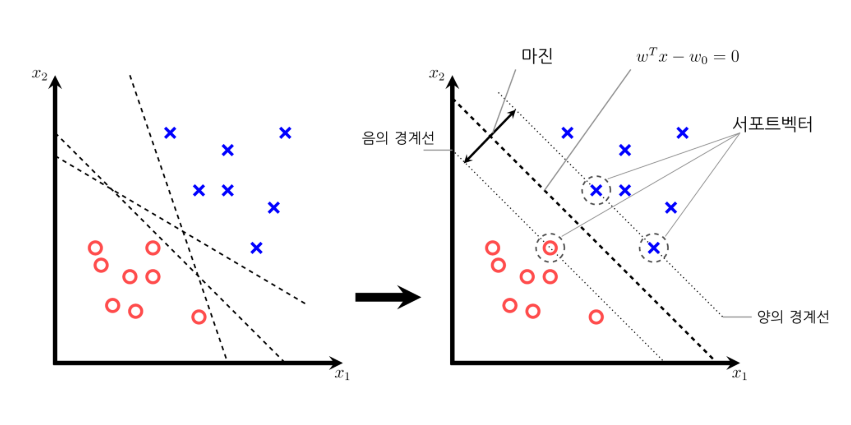

- Support Vectors는 결정 경계와 가까이 있는 데이터 포인트들을 의미한다. 이 데이터들이 경계를 정의하는 결정적인 역할을 한다. 
- 마진(Margin)은 결정 경계와 서포트 벡터 사이의 거리를 의미. 최적의 결정 경계는 마진을 최대화한다. SVM은 이 마진을 최대화하는 분류 경계면을 찾는 기법입니다

- n개의 속성을 가진 데이터에는 최소 n+1개의 서포트 벡터가 존재한다.

- 가우시안 커널은 새로운 데이터 포인트에 대해 각 서포트 벡터와의 거리를 측정한다. 
  분류 결정은 이러한 거리에 기반하며, 서포트 벡터의 중요도는 훈련 과정에서 학습됩니다. 
  데이터 포인트 사이의 거리는 다음 식에 의해 계산됩니다.

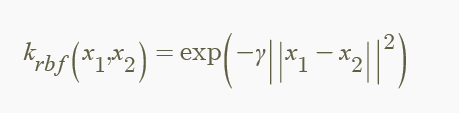

위 식을 가우시안 커널 함수라고 부른다. x1과 x2는 데이터 포인트이고 ||x1-x2||는 유클리디안 거리입니다. 
SVM 매개변수로는 2가지가 있습니다. 한가지는 감마이고, 다른 한가지는 매개변수 C 이다. 
감마는 가우시안 커널 폭의 역수에 해당한다. 값이 작을 수록 넓은 영역을 뜻하며, 값이 클수록 영향이 미친는 범위가 제한적이다.
C는 각 포인트의 중요도를 제한하는 역할을 한다. 

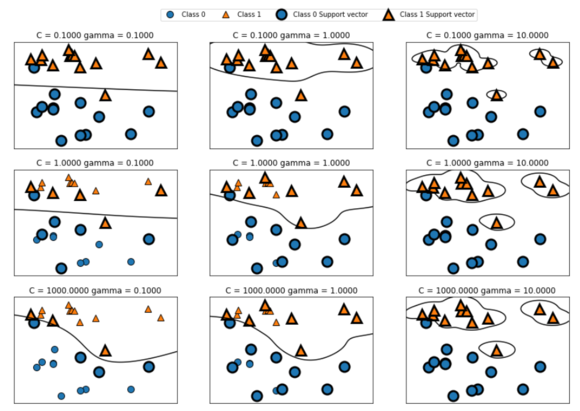

gamma 0.1 -> 10 으로 증가합니다.

작은 gamma는 gaussia kernel의 반경을 크게 하여 많은 포인트들이 가까이 있는 것으로 고려됩니다.따라서 왼쪽 그림의 decision boundary는 부드럽지만 오른쪽 그림의 decision boundary는 데이터 포인트 하나에 민감합니다.

gamma의 값이 클수록 model의 복잡도가 올라가는 것을 확인할 수 있습니다.



위에서 아래로는 C 값을 0.1 -> 1000으로 증가합니다.

linear model과 마찬가지로 작은 C값은 제약이 큰 model을 만듭니다. ==> 일반화 성능이 증가
C값을 증가시키면 제약이 거의 없어져 포인트 하나 값에 영향이 커집니다. ==> 복잡도 증가
오른쪽으로 갈 수록, 결정 경계는 하나의 포인트에 굉장히 민감해진다. 즉 감마값이 커질 수록, 모델이 더욱 복잡하게 된다. 아래로 갈 수록 각 데이터 포인트의 영향력이 작아진다. 즉 C가 커질수록 고려되는 서포트 벡터가 줄어들어 근처의 경계 근처 서포트 벡터에 대해서만 고려를 하게 된다

- 장점: 대부분의 머신러닝 지도 학습 알고리즘은 학습 데이터 모두를 사용하여 모델을 학습한다. 
  그런데 SVM에서는 결정 경계를 정의하는 게 결국 서포트 벡터이기 때문에 데이터 포인트 중에서 서포트 벡터만 잘 골라내면
  나머지 쓸 데 없는 수많은 데이터 포인트들을 무시할 수 있다. 그래서 매우 빠르다.


In [55]:
# SVM은 선형 분류와 비선형 분류를 지원하는데, 그 중 선형 모델을 위해 kernel을 linear로 지정.
# 비선형에 대한 kernel로는 rbf와 poly 등이 있다. 


model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)

In [56]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


## 로지스틱 회귀분석(logistic regression)

둘 중에 하나 (TRUE/FALSE) 이항 분류의 문제를 정의.
y의 값이 숫자를 나타내는 것이 아니라 어떤 특정 분류에 속한다는 것의 결과치가 나오게 되는 모델.

유의할 상황 1. ) 
지금은 fail한 시간과 pass한 시간의 data가 같지만 만약 50시간을 공부했을 때 Linear한 선형을 가지고 예측을 하겠지만
실제로 50시간 공부를 했을 때 가지는 값은 pass인 1의 값을 가지게 된다. 
이러한 데이터를 다시 학습시키게 되면 앞에서 예측한 Linear 선형의 기울기가 낮아지게 된다.
그러면 앞의 기준인 0.5로 다시 판별하게 되면 합격인데도 불구하고 불합격으로 판별 받을 수 있게 된다. 

유의할 상황 1. )
예측한 결과 값이 1과 0의 형태가 아니라 수많은 값을 가질 수 있게 된다. 
5시간을 공부해도 50시간을 공부해도 실제로 결과 값은 1인데 Linear Regression을 사용하게 되면 예측 값은 다르게 나온다.

위와 같은 문제로 인해 Classification하기 위해서 0과 1사이의 값을 가지는 수로 바꿔야 한다. 
=> sigmoid 함수: sigmoid 함수를 이용하게 되면 어떤 한 값을 대입시키더라도 0과 1사이의 값을 가지게 된다.

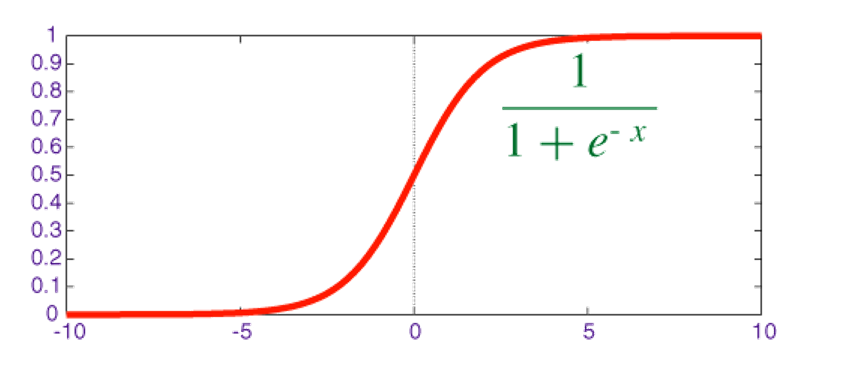

In [57]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


## Decision Tree

의사결정나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형이다. 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있기 때문에 CART(Classification And Regression Tree)라고도 한다.

### [분류법]

1. 여러가지 독립 변수 중 하나의 독립 변수를 선택하고 그 독립 변수에 대한 기준값(threshold)을 정한다. 이를 분류 규칙이라고 한다. 최적의 분류 규칙을 찾는 방법은 이후에 자세히 설명한다.
2. 전체 학습 데이터 집합(부모 노드)을 해당 독립 변수의 값이 기준값보다 작은 데이터 그룹(자식 노드 1)과 해당 독립 변수의 값이 기준값보다 큰 데이터 그룹(자식 노드 2)으로 나눈다.
3. 각각의 자식 노드에 대해 1~2의 단계를 반복하여 하위의 자식 노드를 만든다. 단, 자식 노드에 한가지 클래스의 데이터만 존재한다면 더 이상 자식 노드를 나누지 않고 중지한다.

의사결정나무에 전체 트레이닝 데이터를 모두 적용해 보면 각 데이터는 특정한 노드를 타고 내려가게 된다. 각 노드는 그 노드를 선택한 데이터 집합을 가진다. 이 때 노드에 속한 데이터의 클래스의 비율을 구하여 이를 그 노드의 조건부 확률 분포  P(Y=k|X)node 라고 정의한다.

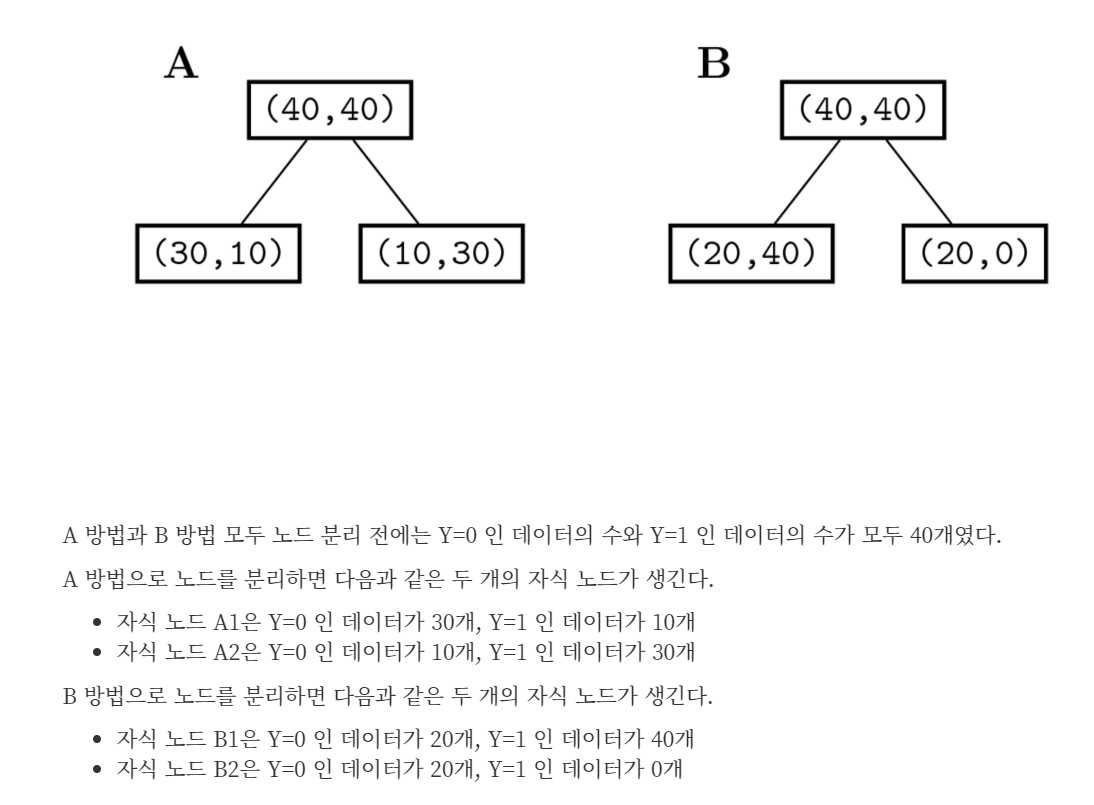

### [분류규칙]

분류규칙을 정하는 방법¶
분류 규칙을 정하는 방법은 부모 노드와 자식 노드 간의 엔트로피를 가장 낮게 만드는 최상의 독립 변수와 기준값을 찾는 것이다. 이러한 기준을 정량화한 것이 정보획득량(information gain)이다. 기본적으로 모든 독립 변수와 모든 가능한 기준값에 대해 정보획득량을 구하여 가장 정보획득량이 큰 독립 변수와 기준값을 선택한다.

정보획득량¶
정보획득량(information gain)는  X 라는 조건에 의해 확률 변수  Y 의 엔트로피가 얼마나 감소하였는가를 나타내는 값이다. 다음처럼  Y 의 엔트로피에서  X 에 대한  Y 의 조건부 엔트로피를 뺀 값으로 정의된다.

IG[Y,X]=H[Y]−H[Y|X]

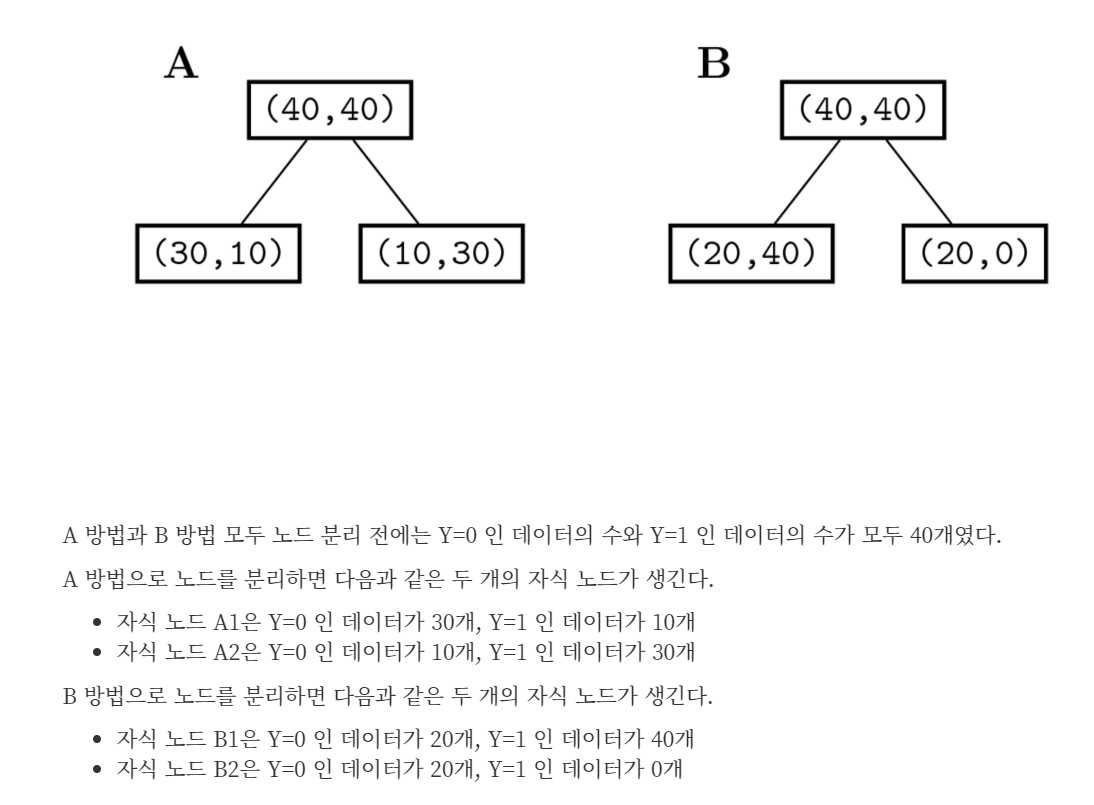

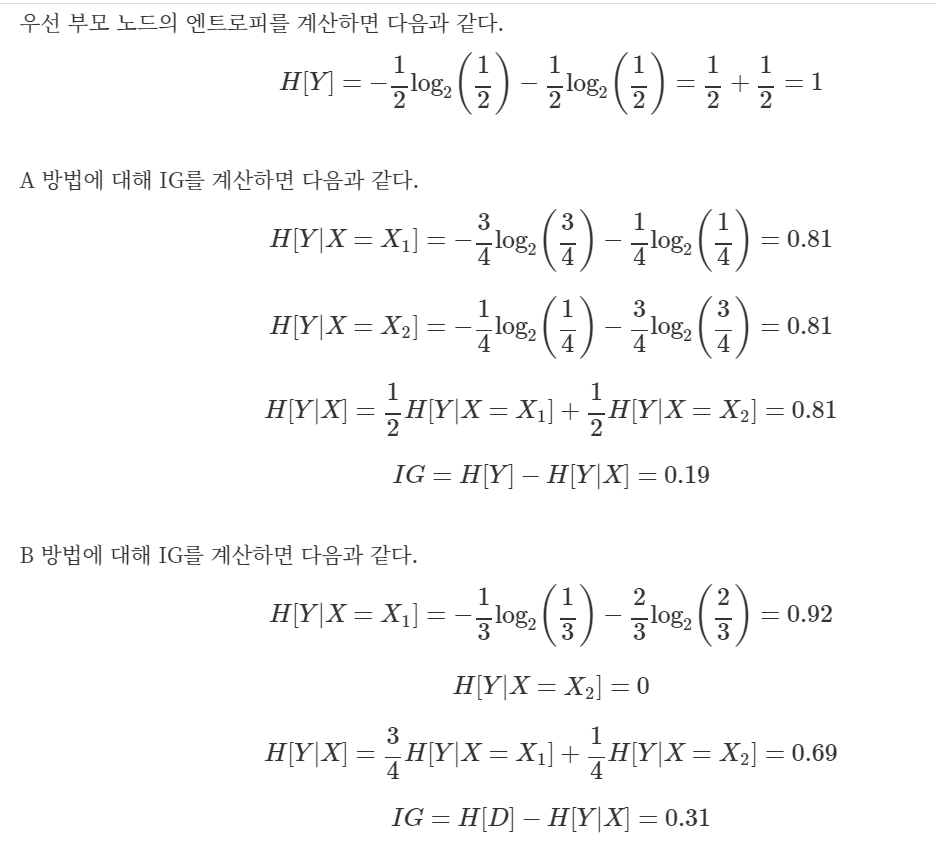

### 의사결정나무 시각화

draw_decision_tree 함수:의사결정나무의 의사 결정 과정의 세부적인 내역을 다이어그램으로 보여준다.

plot_decision_regions 함수: 이러한 의사 결정에 의해 데이터의 영역이 어떻게 나뉘어졌는지를 시각화하여 보여준다.

In [58]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


## K-Nearest Neighbours(KNN)

알고리즘의 이름 처럼 새로운 데이터를 입력 받았을 때 이 데이터와 가장 근접한 데이터들의 종류가 무엇인지 확인하고 많은 데이터의 종류로 분류하는 알고리즘이다.
Classification의 대표적인 알고리즘으로 지도 학습(supervisor Learning)에 해당한다. 

K=1, K=3의 개수에 따라 예측이 달라지는 것을 확인할 수 있다. 
KNN 알고리즘은 K에 따라 결과가 달라지기 때문에 K를 정해주는 것이 가장 중요한 요소 이다.K를 너무 작게 설정 했을 경우 과적합의 우려 되며 K를 너무 크게 설정했을 경우 데이터 구조 파악이 어렵다.

- n_neighbors로 k를 정해줘야 한다. (그리고 x 데이터를 분류를 할 때 k개의 이웃 중 거리가 가까운 이웃의 영향을 더 많이 받도록 가중치를 설정하려면 weights = "distance"를 지정해줄 수 있다. 

- KNeighborsClassifier에서는 .score()를 쓰면 모델의 정확도를 바로 확인할 수 있다.

In [59]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


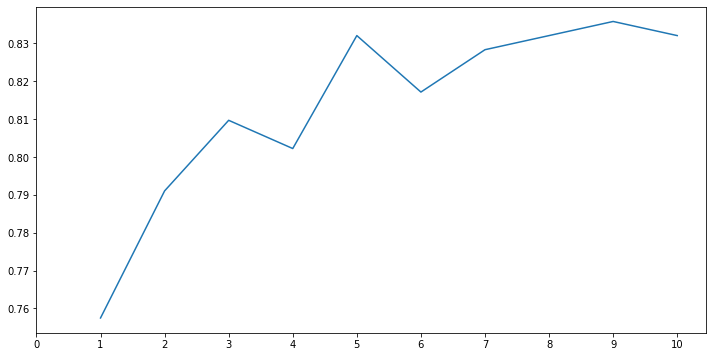

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [60]:
# KNN model의 n_neighbours attribute 바꾸기(기본값: 5) 

a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

## Gaussian Naive Bayes

나이브 베이즈 분류기(Naive Bayes Classifier)는 “베이즈 정리”를 활용하여 분류를 수행하는 머신러닝 지도학습 알고리즘이다. 특히 텍스트(문서)의 분류에 많이 사용된다. 

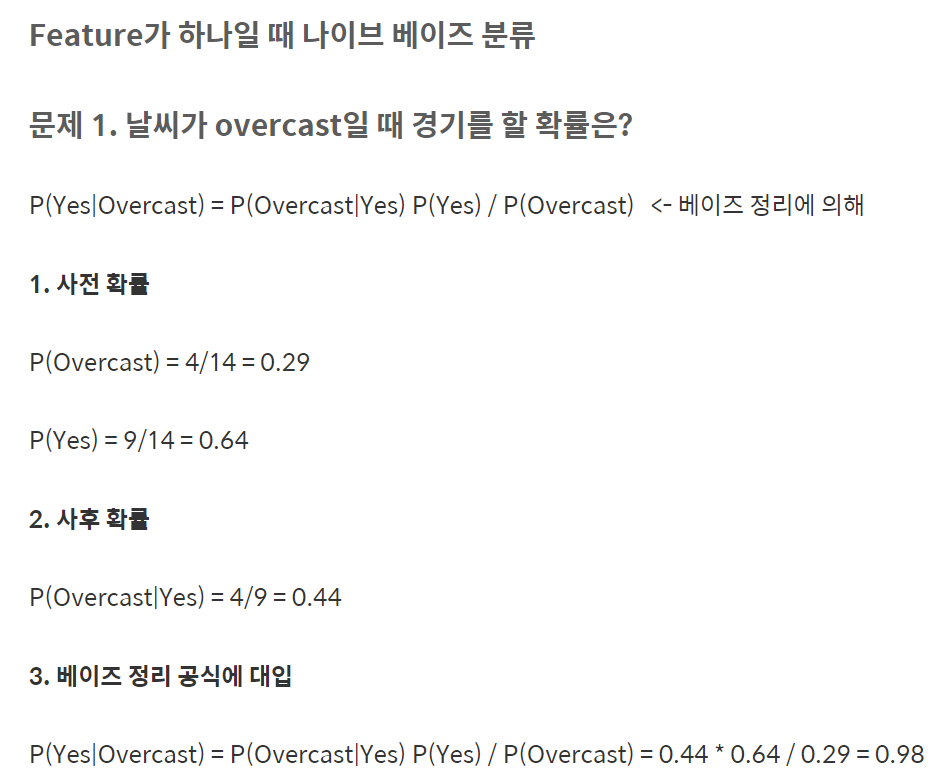


Feature가 Multiple일 때 나이브 베이즈 분류

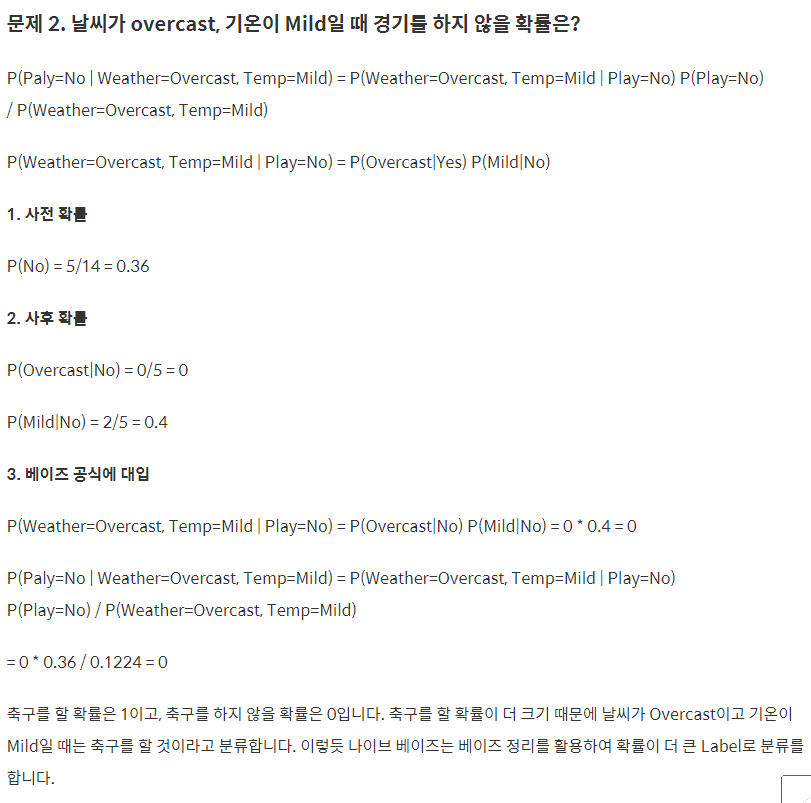
 

In [61]:
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.832089552238806


## Random Forests(랜덤 포레스트)

랜덤포레스트는 수많은 의사결정 트리가 모여 만들어진 숲으로 표현한다. 
더많은 요소를 무작위로 결합하여 여러 의사결정 트리를 생성하여 결과를 반환한다.

결과를 도출하는 과정에서 모든 의사결정트리가 같은 답을 반환하지는 않을 것이다.
의견이 통합되지 않는 경우에는 다수결의 원칙으로 더 많은 반환값을 최종 결과로 선정한다. 이렇게 결과를 합치고, 의견을 통합하는 방식을 앙상블(Ensemble method)이라고한다.

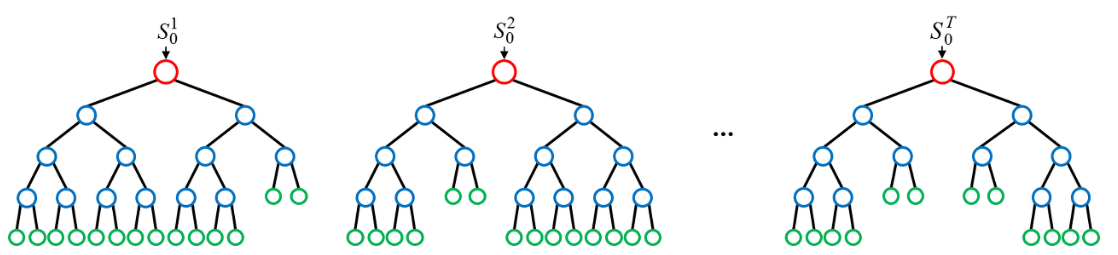

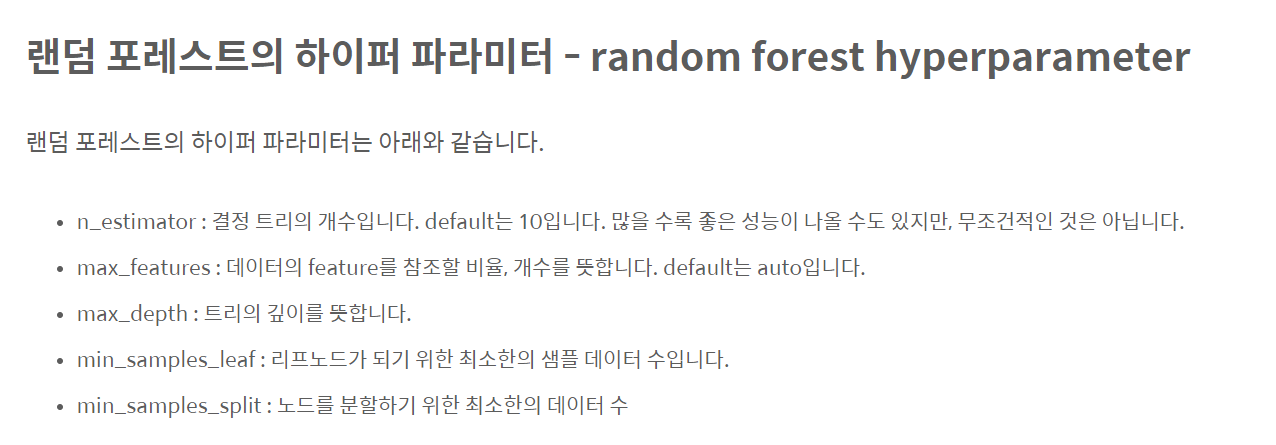

In [62]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8059701492537313


### Cross Validation

모형의 정확성만이 분류기의 견고성을 결정하는 요인은 아니다. 
분류자가 훈련 데이터에 대해 훈련을 받고 시험 데이터에 대해 테스트를 거치면 정확도가 90%에 이른다고 가정해 보자.
이제 이것은 분류기에게는 매우 좋은 정확도로 보이지만, 우리는 그것이 다가오는 모든 새로운 시험 세트에 대해 90%가 될 것이라는 것을 확인할 수 있을까? ? 정답은 "아니오"이다. 
왜냐하면 분류자가 자신을 훈련시키기 위해 사용할 모든 인스턴스를 결정할 수는 없기 때문이다.
훈련과 시험 데이터가 바뀌면 정확도도 달라진다. 그것은 증가하거나 감소할 수 있다. 이것은 모델 분산이라고 알려져 있다.

1) K-Fold Cross Validation은 먼저 데이터 집합을 k-subset으로 나누어 작동합니다.

2) 데이터 세트를 (k = 5) 부분으로 나눕니다. 테스트를 위해 1 개의 부품을 예약하고 4 개의 부품에 대해 알고리즘을 훈련시킵니다.

3) 우리는 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 훈련함으로써 프로세스를 계속합니다. 그런 다음 정확도와 오류를 평균하여 알고리즘의 평균 정확도를 얻습니다.

이것을 K-Fold Cross Validation이라고합니다.

4) 알고리즘은 일부 학습 데이터의 데이터 세트에 적합하지 않을 수 있으며 때로는 다른 학습 세트의 데이터에 적합 할 수도 있습니다.
   따라서 교차 검증을 통해 일반화 된 모델을 얻을 수 있습니다.

### Scikit learn

모델 성능 평가는 보통 2개의 목적이 있습니다. 

1. Unseen 데이터에 대한 성능을 예측하기 위해, 
2. 더 좋은 모델을 선택하기 위해 (혹은 Hyperparameter Tuning) 입니다. 

   교차 검증은 1,2를 달성하기 위한 좋은 방법입니다. 
   파이썬에서 K-겹 CV를 하는 방법은 여러가지가 있지만 scikit-learn이 많이 사용됩니다.

1) create_model()을 통해 Keras Model 객체를 얻음

2) KerasClassifier Wrapper를 통해 Keras Model을 Scikit learn에서 사용할 수 있는 객체로 변환을 한다. 

3) Scikit learn의 kFold를 통해 KFold의 Rule을 지정한다. 
   model_selection에서 KFold 분할기를 임포트하고 원하는 폴드 수를 넣어 객체를 생성.

   - kfold = KFold(n_splits=5) 
   
   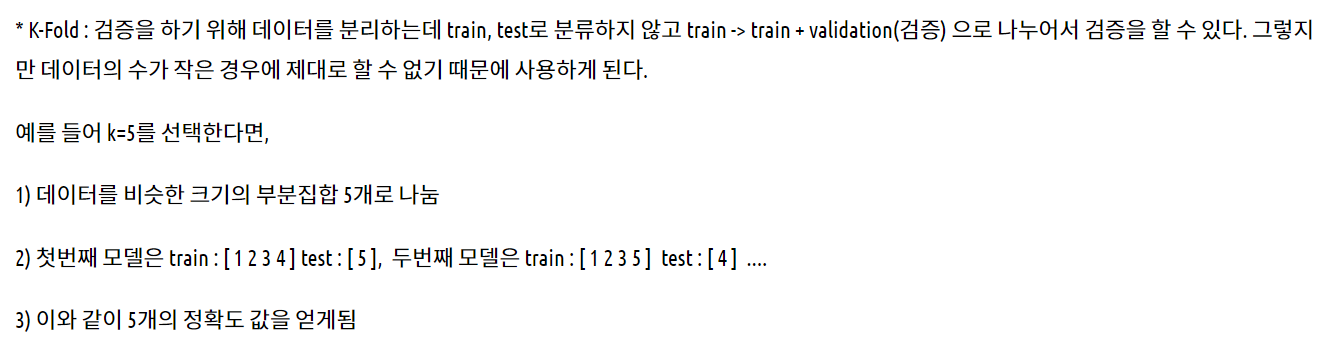
   
   
+    for n in [3, 5]:

     kfold = KFold(n_splits=n, shuffle=True, random_state=0)
     
     
 - 데이터를 섞어서 샘플의 순서를 랜덤하게 만드는것(KFold의 shuffle 매개변수를 True)

 - 데이터를 섞을 때 random_state를 고정해서 똑같은 작업을 재현할 수있음. 그렇지 않으면 cross_val_score를 실행할 때마다 폴드가 바뀌어    매번 결과가 달라짐
    
 
4)  cross_val_score을 통해 해당 모델의 cross validation score를 계산.

    scores = cross_val_score(logreg, iris.data, iris.target, cv=5) # model, train, target, cross validation

In [63]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [64]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

In [65]:
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.803608,0.026087
Naive Bayes,0.801386,0.028999
Random Forest,0.814831,0.035163


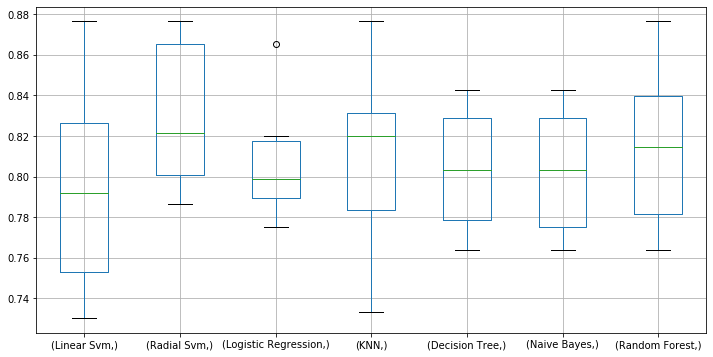

In [66]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

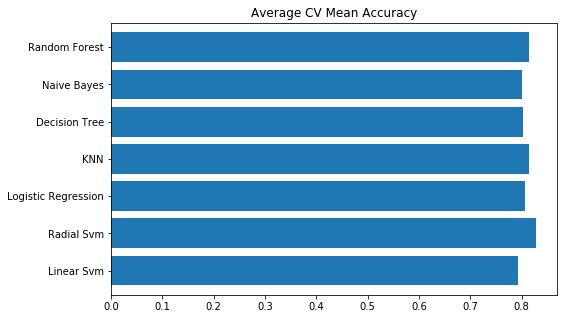

In [67]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### 혼란 메트릭스

불균형으로 인해 분류 정확도가 잘못 될 수 있다. 
모델이 어디에서 잘못되었는지 또는 모델이 잘못 예측 한 클래스를 보여주는 혼란 매트릭스를 사용하여 
요약 된 결과를 얻을 수 있다.

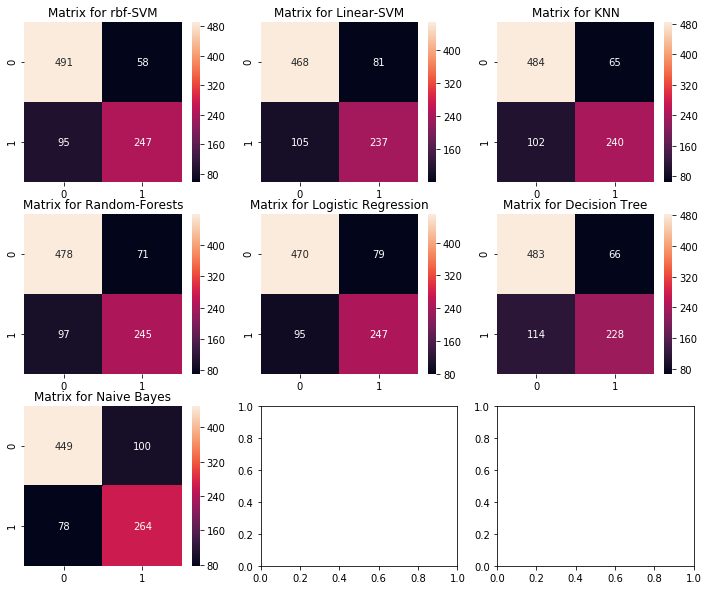

In [68]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### 혼합 메트릭스 해석

왼쪽 대각선은 각 클래스에 대한 올바른 예측 수를 나타내고 오른쪽 대각선은 잘못된 예측 수를 나타낸다. 
rbf-SVM의 첫 번째 해석해보자면
1) 아니오. 정확한 예측값은 491 (죽음의 경우) + 247 (생존 한 경우)이며 
   평균 CV 정확도는 (491 + 247) / 891 = 82.8 %이다. 

2) 오류-> 잘못 분류 된 58 명은 생존 한 것으로, 95 명은 사망 한 것으로 예측.
   따라서 살아남은 상태에서 죽은 것을 예측함으로써 더 많은 실수를 저질렀다.
    
모든 행렬을 살펴보면 rbf-SVM은 죽은 승객을 정확하게 예측할 가능성이 높지만
NaiveBayes는 생존 한 승객을 정확하게 예측할 가능성이 높다고 말할 수 있습니다.

### Hyper-Parameters Tuning
    
알고리즘 학습 속도를 변경하고 더 나은 모델을 얻도록 조정하는데, 이것을 하이퍼 파라미터 튜닝이라고 한다.

#### GridSearch 

GridSearch 는 우리가 지정해준 몇 가지 잠재적 Parameter들의 후보군들의 조합 중에서 가장 Best 조합을 찾아준다. 하나하나 대입해 가면서 loss를 확인하는 작업을 GridSearch는 대신 해준다고 보면 된다. 
또한, sklearn 패키지에서 제공해주고 있기때문에 매우 손쉽게 사용할 수 있다.

하지만, 가장 큰 단점은 지정해 준 hyperparameter 후보군의 갯수만큼 비례하여 시간이 늘어기 때문에 최적의 조합을 찾을 때까지 시간이 매우 오래 걸린다는 단점이 있다.

In [69]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   29.4s finished


In [70]:
# 일반적으로 verbose는 프로그램의 작업에 대한 자세한 정보를보고하는 데 사용할 수있는 선택적 인수.

n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.2min finished


0.819327098110602
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


### [ 모델링 1차 평가 정리 ]
#### TRbf-Svm의 가장 좋은 성적은 82.82%이다.(파라미터-> C=0.05 and gamma=0.1)
#### RandomForest의 가장 좋은 성적은 81.8% 이다. (파라미터-> n_estimators=900)

## 부트스트랩(Bootstrap)

모수의 분포를 추정하는 강력한 방법은 현재 있는 표본에서 추가적으로 표본을 복원 추출하고 각 표본에 대한 통계량을 다시 계산하는 것입니다. 
이러한 절차는 부트스트랩이라고 하며, 데이터가 정규분포를 따라야 한다는 가정이 꼭 필요하지 않습니다. 

1억 개의 모집단에서 뽑은 200개의 표본이 있다고 합시다. 
200개로만 통계량을 구하는 것이 아니라 200개를 기준으로 복원 추출하여 새로운 통계량을 구하는 것입니다.

1. 200개의 표본 중 하나를 뽑아 기록하고 다시 제자리에 둡니다.
2. 이를 n번 반복합니다.
3. n번 재표본추출한 값의 평균을 구합니다.
4. 1~3 단계를 R번 반복합니다. (R: 부트스트랩 반복 횟수)
5. R개의 평균에 대한 결과를 사용하여 신뢰구간을 구합니다. 


표본이 200개밖에 없을지라도 부트스트랩을 통해 200개 보다 더 많은 통계량을 가질 수 있습니다.
R이 클수록 신뢰구간에 대한 추정이 더 정확해집니다. 

어떻게 200개의 표본에서 여러 번 표본을 뽑는 것이 모수의 분포를 더 정확하게 추정할 수 있을까요? 
200개의 표본은 모수로부터 균등하게 뽑은 것입니다. 모수를 대표하는 표본인 것입니다. 
따라서 부트스트랩은 이빨 빠진 모수 분포 사이사이에 이빨을 심어주는 것과 같은 기능을 합니다. 

### 부트스트랩 구현

부트스트랩을 10,000번 반복해서 커피를 마시지 않는 사람과 마시는 사람의 키 차이의 99% 신뢰구간을 구합니다.

커피를 마시지 않는 사람과 커피를 마시는 사람의 평균 키 차이

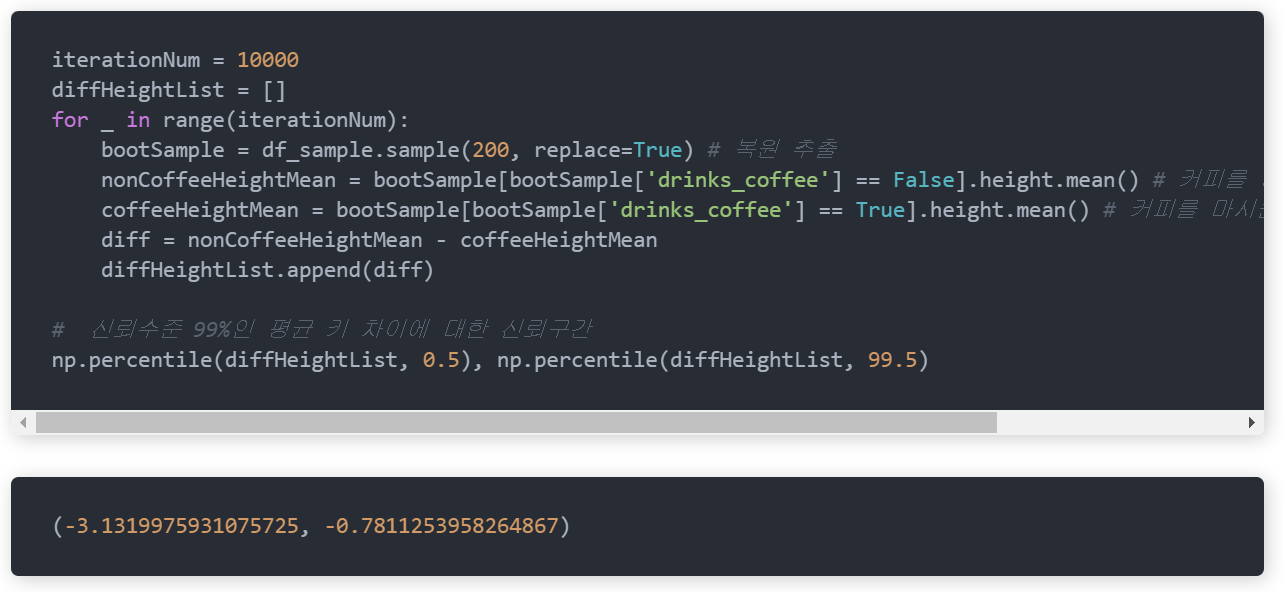

## 앙상블(Ensemble)

앙상블은 조화 또는 통일을 의미합니다.

어떤 데이터의 값을 예측한다고 할 때, 하나의 모델을 활용합니다. 하지만 여러 개의 모델을 조화롭게 학습시켜 
그 모델들의 예측 결과들을 이용한다면 더 정확한 예측값을 구할 수 있을 겁니다.

앙상블 학습은 여러 개의 결정 트리(Decision Tree)를 결합하여 하나의 결정 트리보다 더 좋은 성능을 내는 머신러닝 기법입니다. 
앙상블 학습의 핵심은 여러 개의 약 분류기 (Weak Classifier)를 결합하여 강 분류기(Strong Classifier)를 만드는 것입니다. 
그리하여 모델의 정확성이 향상됩니다.

앙상블 학습법에는 두 가지가 있습니다. 배깅(Bagging)과 부스팅(Boosting)입니다. 
이를 이해하기 위해서는 부트스트랩(Bootstrap)과 결정 트리(Deicison Tree)에 대한 개념이 선행되어야 합니다. 

### 1. 배깅(Bagging)

Bagging은 Bootstrap Aggregation의 약자입니다. 
배깅은 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregration)하는 방법입니다.

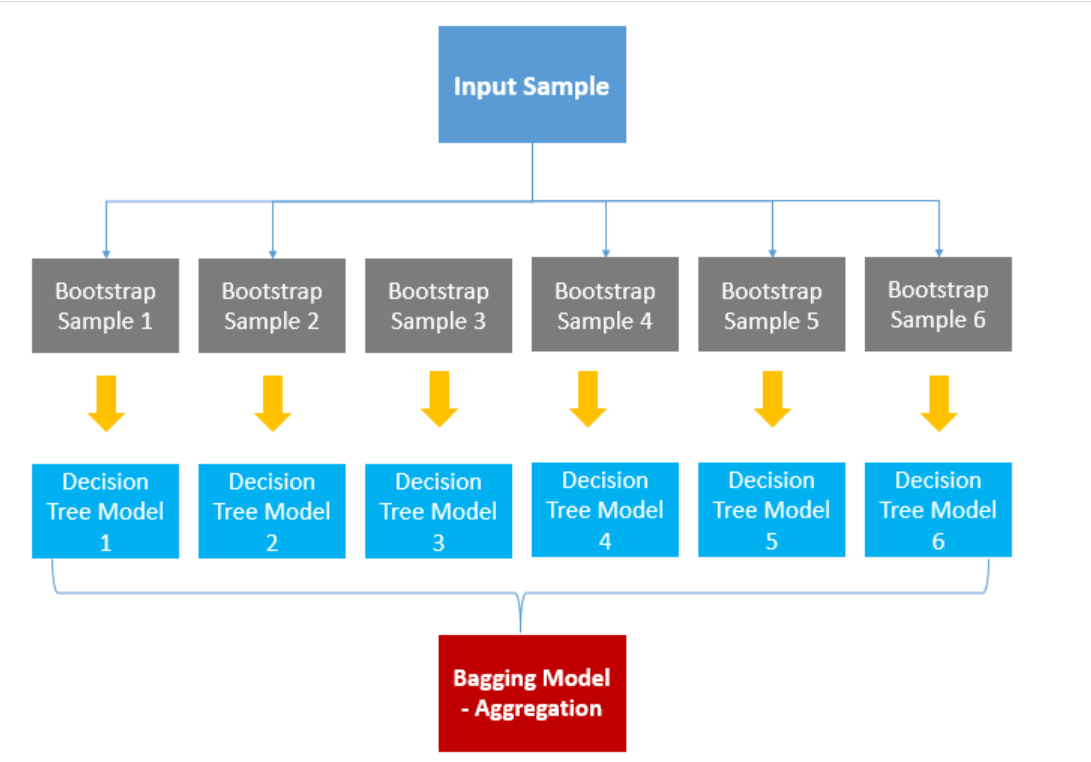

우선, 데이터로부터 부트스트랩을 합니다. (복원 랜덤 샘플링) 부트스트랩한 데이터로 모델을 학습시킵니다. 
그리고 학습된 모델의 결과를 집계하여 최종 결과 값을 구합니다.

Categorical Data는 투표 방식(Votinig)으로 결과를 집계하며, Continuous Data는 평균으로 집계합니다.

Categorical Data일 때, 투표 방식으로 한다는 것은 전체 모델에서 예측한 값 중 가장 많은 값을 최종 예측값으로 선정한다는 것입니다. 
6개의 결정 트리 모델이 있다고 합시다. 4개는 A로 예측했고, 2개는 B로 예측했다면 
투표에 의해 4개의 모델이 선택한 A를 최종 결과로 예측한다는 것입니다. 

평균으로 집계한다는 것은 말 그대로 각각의 결정 트리 모델이 예측한 값에 평균을 취해 최종 Bagging Model의 예측값을 결정한다는 것입니다.

배깅은 간단하면서도 파워풀한 방법입니다. 배깅 기법을 활용한 모델이 바로 랜덤 포레스트입니다.

Scikit-Learn 의 ensemble 서브패키지는 배깅 모형 결합을 위한 BaggingClassifier 클래스를 제공한다. 사용법은 다음과 같다.

base_estimator: 기본 모형
n_estimators: 모형 갯수. 디폴트 10
bootstrap: 데이터의 중복 사용 여부. 디폴트 True
max_samples: 데이터 샘플 중 선택할 샘플의 수 혹은 비율. 디폴트 1.0
bootstrap_features: 특징 차원의 중복 사용 여부. 디폴트 False
max_features: 다차원 독립 변수 중 선택할 차원의 수 혹은 비율 1.0

### 2. 부스팅(Boosting)

부스팅은 가중치를 활용하여 약 분류기를 강 분류기로 만드는 방법입니다. 
배깅은 Deicison Tree1과 Decision Tree2가 서로 독립적으로 결과를 예측합니다. 
여러 개의 독립적인 결정 트리가 각각 값을 예측한 뒤, 그 결과 값을 집계해 최종 결과 값을 예측하는 방식입니다. 
하지만 부스팅은 모델 간 팀워크가 이루어집니다. 처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치가 부여되고,
부여된 가중치가 다음 모델에 영향을 줍니다. 잘못 분류된 데이터에 집중하여 새로운 분류 규칙을 만드는 단계를 반복합니다. 

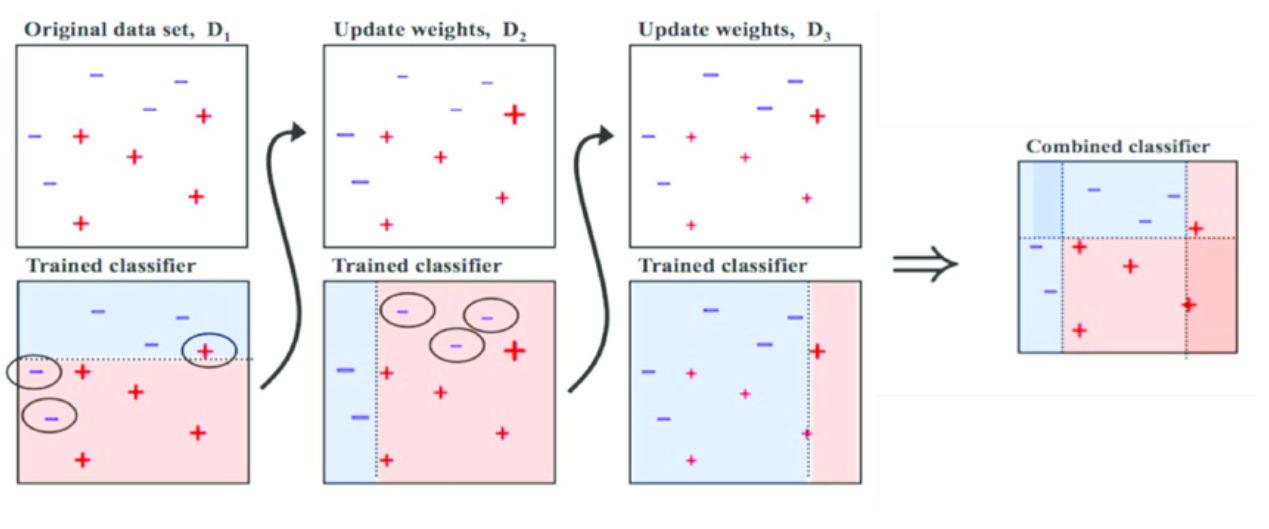

D1에서는 2/5 지점을 횡단하는 구분선으로 데이터를 나누어주었습니다. 하지만 위쪽의 +는 잘못 분류가 되었고, 
아래쪽의 두 -도 잘못 분류되었습니다. 잘못 분류가 된 데이터는 가중치를 높여주고, 잘 분류된 데이터는 가중치를 낮추어 줍니다.

D2를 보면 D1에서 잘 분류된 데이터는 크기가 작아졌고(가중치가 낮아졌고) 잘못 분류된 데이터는 크기가 커졌습니다.(가중치가 커졌습니다.) 
분류가 잘못된 데이터에 가중치를 부여해주는 이유는 다음 모델에서 더 집중해 분류하기 위함입니다. 

D2에서는 오른쪽 세 개의 -가 잘못 분류되었습니다. 따라서 D3에서는 세 개의 -의 가중치가 커졌습니다. 
맨 처음 모델에서 가중치를 부여한 +와 -는 D2에서는 잘 분류가 되었기 때문에 D3에서는 가중치가 다시 작아졌습니다.

D1, D2, D3의 Classifier를 합쳐 최종 Classifier를 구할 수 있습니다. 최종 Classfier는 +와 -를 정확하게 구분해줍니다.

#### [배깅과 부스팅의 차이점]

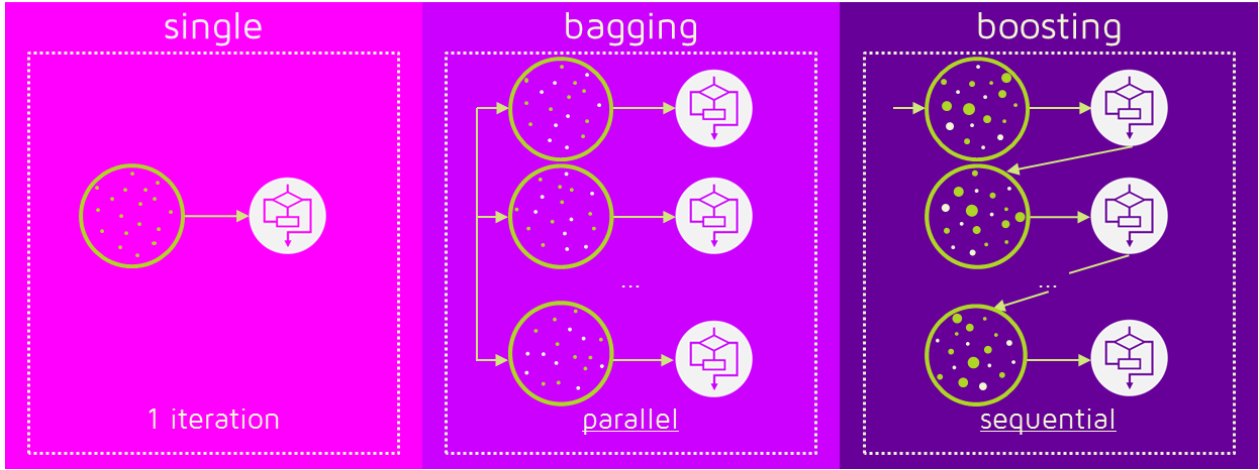

위 그림에서 나타내는 바와 같이 배깅은 병렬로 학습하는 반면, 부스팅은 순차적으로 학습합니다. 
한번 학습이 끝난 후 결과에 따라 가중치를 부여합니다. 그
렇게 부여된 가중치가 다음 모델의 결과 예측에 영향을 줍니다.

오답에 대해서는 높은 가중치를 부여하고, 정답에 대해서는 낮은 가중치를 부여합니다. 
따라서 오답을 정답으로 맞추기 위해 오답에 더 집중할 수 있게 되는 것입니다. 

부스팅은 배깅에 비해 error가 적습니다. 즉, 성능이 좋습니다. 
하지만 속도가 느리고 오버 피팅이 될 가능성이 있습니다. 
개별 결정 트리의 낮은 성능이 문제라면 부스팅이 적합하고, 오버 피팅이 문제라면 배깅이 적합합니다.

### 다수결 방법
다수결 방법은 가장 단순한 모형 결합 방법으로 전혀 다른 모형도 결합할 수 있다. 
다수결 방법은 Hard Voting 과 Soft Voting 두 가지로 나뉘어진다.

hard voting: 단순 투표. 개별 모형의 결과 기준
soft voting: 가중치 투표. 개별 모형의 조건부 확률의 합 기준
    
Scikit-Learn 의 ensemble 서브패키지는 다수결 방법을 위한 VotingClassifier 클래스를 제공한다.

estimators: 개별 모형 목록, 리스트나 named parameter 형식으로 입력
voting: 문자열 {hard, soft} hard voting 과 soft voting 선택. 디폴트는 hard
weights: 사용자 가중치 리스트

In [71]:
# svm 모델을 만들 때 probability=True로 설정하면 훈련이 끝난 후 
# (훈련 데이터에 5겹 교차검증을 사용하여 추가로 훈련시킨)svm의 점수에
# 로지스틱 회귀를 훈련시켜 확률 계산한다.  

from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


In [72]:
# Bagged KNN¶

from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


In [73]:
# Bagged DecisionTree

model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8227590511860174


### 부스팅 알고리즘 1. AdaBoost

Adaptive Boost의 줄임말로서 약한 학습기(weak learner)의 오류 데이터에 가중치를
부여하면서 부스팅을 수행하는 대표적인 알고리즘
속도나 성능적인 측면에서 decision tree를 약한 학습기로 사용함

1) base_estimators:  학습에 사용하는 알고리즘
- Default = None
→ DecisionTreeClassifier(max_depth=1)가 적용

2) n_estimatorr: 생성할 약한 학습기의 갯수를 지정
- Default = 50

n_estimators를 늘린다면 생성하는 weak learner의 수는 늘어남
이 여러 학습기들의 decision boundary가 많아지면서 모델이 복잡해짐

3) learning_rate: 학습을 진행할 때마다 적용하는 학습률(0~1)
- Weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수
- Default = 1.0

위의 두 가지는 trade-off 관계입니다.
n_estimators(또는 learning_rate)를 늘리고, learning_rate(또는 n_estimators)을 줄인다면 
서로 효과가 상쇄됩니다. 때문에 이 두 파라미터를 잘 조정하는 것이 알고리즘의 핵심.

In [74]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


### 부스팅 알고리즘 2. Gradient Boost Machine(GBM)

AdaBoost와 유사하지만, 가중치 업데이트를 경사하강법(Gradient Descent)를 이용하여 최적화된 결과를 얻는 알고리즘입니다.
GBM은 예측 성능이 높지만 Greedy Algorithm으로 과적합이 빠르게되고, 시간이 오래 걸린다는 단점이 있습니다.

※ 경사하강법
분류의 실제값을 y, 피처에 기반한 예측함수를 F(x), 오류식을 h(x) = y-F(x)라고 하면 
이 오류식을 최소화하는 방향성을 가지고 가중치 값을 업데이트

※ Greedy Algorithm(탐욕 알고리즘)
미래를 생각하지 않고 각 단계에서 가장 최선의 선택을 하는 기법으로
각 단계에서 최선의 선택을 한 것이 전체적으로도 최선이길 바라는 알고리즘입니다.
물론 모든 경우에서 그리디 알고리즘이 통하지는 않습니다.
가령 지금 선택하면 1개의 마시멜로를 받고, 1분 기다렸다 선택하면 2개의 마시멜로를 받는 문제에서는,
그리디 알고리즘을 사용하면 항상 마시멜로를 1개밖에 받지 못합니다.
지금 당장 최선의 선택은 마시멜로 1개를 받는 거지만, 결과적으로는 1분 기다렸다가 2개 받는 게 최선이기 때문입니다.

- loss: 경사하강법에서 사용할 cost function 지정
  특별한 이유가 없으면 default 값인 deviance 적용

- subsample	- 개별 트리가 학습에 사용하는 데이터 샘플링 비율(0~1)
  default=1 (전체 데이터 학습)
  이 값을 조절하여 트리 간의 상관도를 줄일 수 있음

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


## 부스팅 알고리즘 3. xgboost

GBM의 느리고, 과적함 단점을 보완해주기 위해 나온 알고리즘. 
xgboost는 GBM보다 빠르고, 과적합 방지가 가능한 규제가 포함되어 있다. 
CART(Classification And Regression Tree) 를 기반으로 하여 분류와 회귀가 다 가능하다
조기종료를 제공하고, GBM 기반으로 가중치 부여를 겅사하강법으로 한다. 

-colsample_bytree: 컬럼의 샘플링 비율
-min_split_loss: 리프 노드를 추가적으로 나눌지 결정하는 값
-reg_lanbda: L2 규제
-reg_alpha: L1 규제

-early_stopping_rounds: 지정한 숫자만큼 돌리는 동안 성능이 좋아지지 않으면, 해당 숫자 전, 평가 기준이 되는 모델을 사용하도록 하고 모델 training을  일찍 종료
-eval set: 조기종료할 때 어떤 데이터를 보고 평가할 것인지 설정

In [76]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


In [77]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 16.1min finished


0.8293892411022534
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


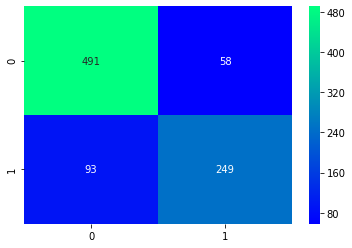

In [79]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

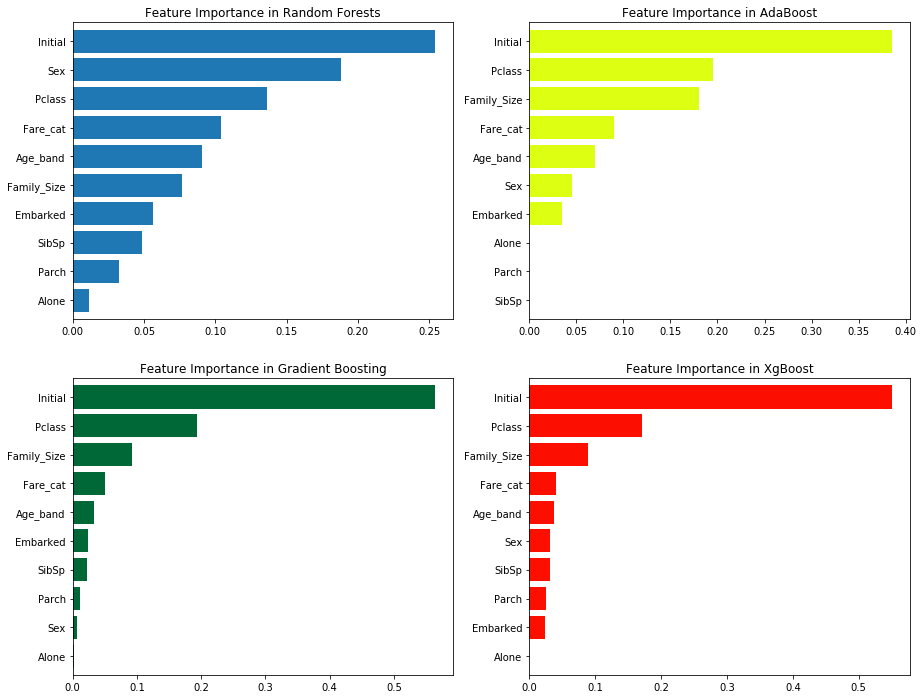

In [80]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

### 요약

1)일반적으로 중요한 기능으로는 Initial,Par_cat,Pclass,Family_Size 등이 있다.

2)성별 특성은 전혀 중요성을 부여하지 않는 것 같은데, 앞서 살펴본 바와 같이 성별과 Pclass의 결합이
매우 좋은 차별화 요소를 주고 있다. 성은 랜덤 포레스트에서만 중요하게 보인다.

그러나, 우리는 많은 분류자에서 맨 위에 있는 Initial을 볼 수 있다.
우리는 이미 성별과 이니셜(Initial)의 긍정적인 상관관계를 보았기 때문에 둘 다 성별을 가리킨다.

3)P class 및 Fare_cat과 비슷하게 승객 및 Family_Size with Alone, Parch, SibSp의 상태를 말한다.